In [1]:
## Install pandas data reader
!pip install pandas-datareader

In [2]:
!pip install yfinance

In [3]:
!pip install pmdarima

In [4]:
import pandas_datareader as pdr
from pandas import Series as Series
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
from datetime import datetime
import time
from pylab import rcParams
from numpy import log
from numpy.random import normal, seed
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [6]:
import yfinance as yf

In [7]:
# Create a Ticker object for NIFTY
nifty = yf.Ticker("^NSEI")

# Fetch historical data
nifty_data = nifty.history(period="1d", start="2007-09-17", end="2023-11-11")

In [8]:
nifty_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-06 00:00:00+05:30,19345.849609,19423.000000,19309.699219,19411.750000,180700,0.0,0.0
2023-11-07 00:00:00+05:30,19404.050781,19423.500000,19329.099609,19406.699219,198700,0.0,0.0
2023-11-08 00:00:00+05:30,19449.599609,19464.400391,19401.500000,19443.500000,195000,0.0,0.0


In [9]:
nifty_data = nifty_data.reset_index()

In [10]:
nifty_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
1,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2,2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
3,2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
4,2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...,...
3955,2023-11-06 00:00:00+05:30,19345.849609,19423.000000,19309.699219,19411.750000,180700,0.0,0.0
3956,2023-11-07 00:00:00+05:30,19404.050781,19423.500000,19329.099609,19406.699219,198700,0.0,0.0
3957,2023-11-08 00:00:00+05:30,19449.599609,19464.400391,19401.500000,19443.500000,195000,0.0,0.0
3958,2023-11-09 00:00:00+05:30,19457.400391,19463.900391,19378.349609,19395.300781,208400,0.0,0.0


In [10]:
l = list(nifty_data.Date)

In [11]:
new_date = list()

In [12]:
for i in l:
    new_date.append(i.strftime('%Y-%m-%d'))

In [13]:
date = pd.DataFrame(new_date, columns = ['date'])

In [14]:
nifty_data["DDate"] = new_date

In [15]:
(nifty_data)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,DDate
0,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0,2007-09-17
1,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0,2007-09-18
2,2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0,2007-09-19
3,2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0,2007-09-20
4,2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0,2007-09-21
...,...,...,...,...,...,...,...,...,...
3955,2023-11-06 00:00:00+05:30,19345.849609,19423.000000,19309.699219,19411.750000,180700,0.0,0.0,2023-11-06
3956,2023-11-07 00:00:00+05:30,19404.050781,19423.500000,19329.099609,19406.699219,198700,0.0,0.0,2023-11-07
3957,2023-11-08 00:00:00+05:30,19449.599609,19464.400391,19401.500000,19443.500000,195000,0.0,0.0,2023-11-08
3958,2023-11-09 00:00:00+05:30,19457.400391,19463.900391,19378.349609,19395.300781,208400,0.0,0.0,2023-11-09


In [16]:
nifty_data.drop(columns=['Dividends','Stock Splits','Date'],inplace = True)

In [17]:
nifty_data = nifty_data.rename(columns = {'DDate' : 'Date'})

In [18]:
new_order = ['Date'] + [col for col in nifty_data if col != 'Date']
nifty_data = nifty_data[new_order]

In [19]:
nifty_data

,Date,Open,High,Low,Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...,...
3955,2023-11-06,19345.849609,19423.000000,19309.699219,19411.750000,180700
3956,2023-11-07,19404.050781,19423.500000,19329.099609,19406.699219,198700
3957,2023-11-08,19449.599609,19464.400391,19401.500000,19443.500000,195000
3958,2023-11-09,19457.400391,19463.900391,19378.349609,19395.300781,208400


For some of the rows there were no previous data available given the time frame (Volume) hence we will treat by filling the values as 0.

In [20]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3960 non-null   object 
 1   Open    3960 non-null   float64
 2   High    3960 non-null   float64
 3   Low     3960 non-null   float64
 4   Close   3960 non-null   float64
 5   Volume  3960 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 185.8+ KB


In [21]:
## checking null value
nifty_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [22]:
nifty_data.describe()

,Open,High,Low,Close,Volume
count,3960.000000,3960.000000,3960.000000,3960.000000,3.960000e+03
mean,9201.307109,9252.658294,9134.812100,9195.053805,1.978998e+05
std,4474.635105,4484.123907,4456.179094,4471.125696,2.117431e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,0.000000e+00
25%,5495.687622,5541.374878,5456.762695,5500.125000,0.000000e+00
50%,8194.850098,8234.399902,8136.549805,8187.750000,1.683500e+05
75%,11383.712402,11434.062500,11316.774902,11370.325195,2.721000e+05
max,20156.449219,20222.449219,20129.699219,20192.349609,1.811000e+06


In [23]:
sort_by_open = nifty_data.sort_values(by = 'Open')

In [24]:
sort_by_open

,Date,Open,High,Low,Close,Volume
291,2008-11-21,2553.600098,2718.600098,2539.800049,2693.449951,0
361,2009-03-12,2574.500000,2646.100098,2574.500000,2617.449951,0
359,2009-03-06,2576.750000,2628.100098,2539.449951,2620.149902,0
275,2008-10-27,2583.750000,2585.300049,2252.750000,2524.199951,0
357,2009-03-04,2611.949951,2655.699951,2611.949951,2645.199951,0
...,...,...,...,...,...,...
3920,2023-09-13,19989.500000,20096.900391,19944.099609,20070.000000,251400
3919,2023-09-12,20110.150391,20110.349609,19914.650391,19993.199219,328100
3921,2023-09-14,20127.949219,20167.650391,20043.449219,20103.099609,275100
3923,2023-09-18,20155.949219,20195.349609,20115.699219,20133.300781,264900


Highest open was on 2023-09-15 with 20156.449219

Lowest open was on 2008-11-21 with 2553.600098

In [25]:
sort_by_close = nifty_data.sort_values(by = 'Close')
sort_by_close

,Date,Open,High,Low,Close,Volume
275,2008-10-27,2583.750000,2585.300049,2252.750000,2524.199951,0
290,2008-11-20,2634.199951,2634.199951,2502.899902,2553.149902,0
360,2009-03-09,2620.100098,2621.250000,2555.600098,2573.149902,0
358,2009-03-05,2645.899902,2663.899902,2564.100098,2576.699951,0
274,2008-10-24,2936.250000,2936.250000,2525.050049,2584.000000,0
...,...,...,...,...,...,...
3918,2023-09-11,19890.000000,20008.150391,19865.349609,19996.349609,248800
3920,2023-09-13,19989.500000,20096.900391,19944.099609,20070.000000,251400
3921,2023-09-14,20127.949219,20167.650391,20043.449219,20103.099609,275100
3923,2023-09-18,20155.949219,20195.349609,20115.699219,20133.300781,264900


Lowest Close was on 2008-10-27 with 2524.199951

Highet Close was on 2023-9-15 with 20192.349609

In [26]:
## reverting back date as index

nifty_data = nifty_data.set_index('Date')

In [27]:
nifty_data.index = pd.to_datetime(nifty_data.index)

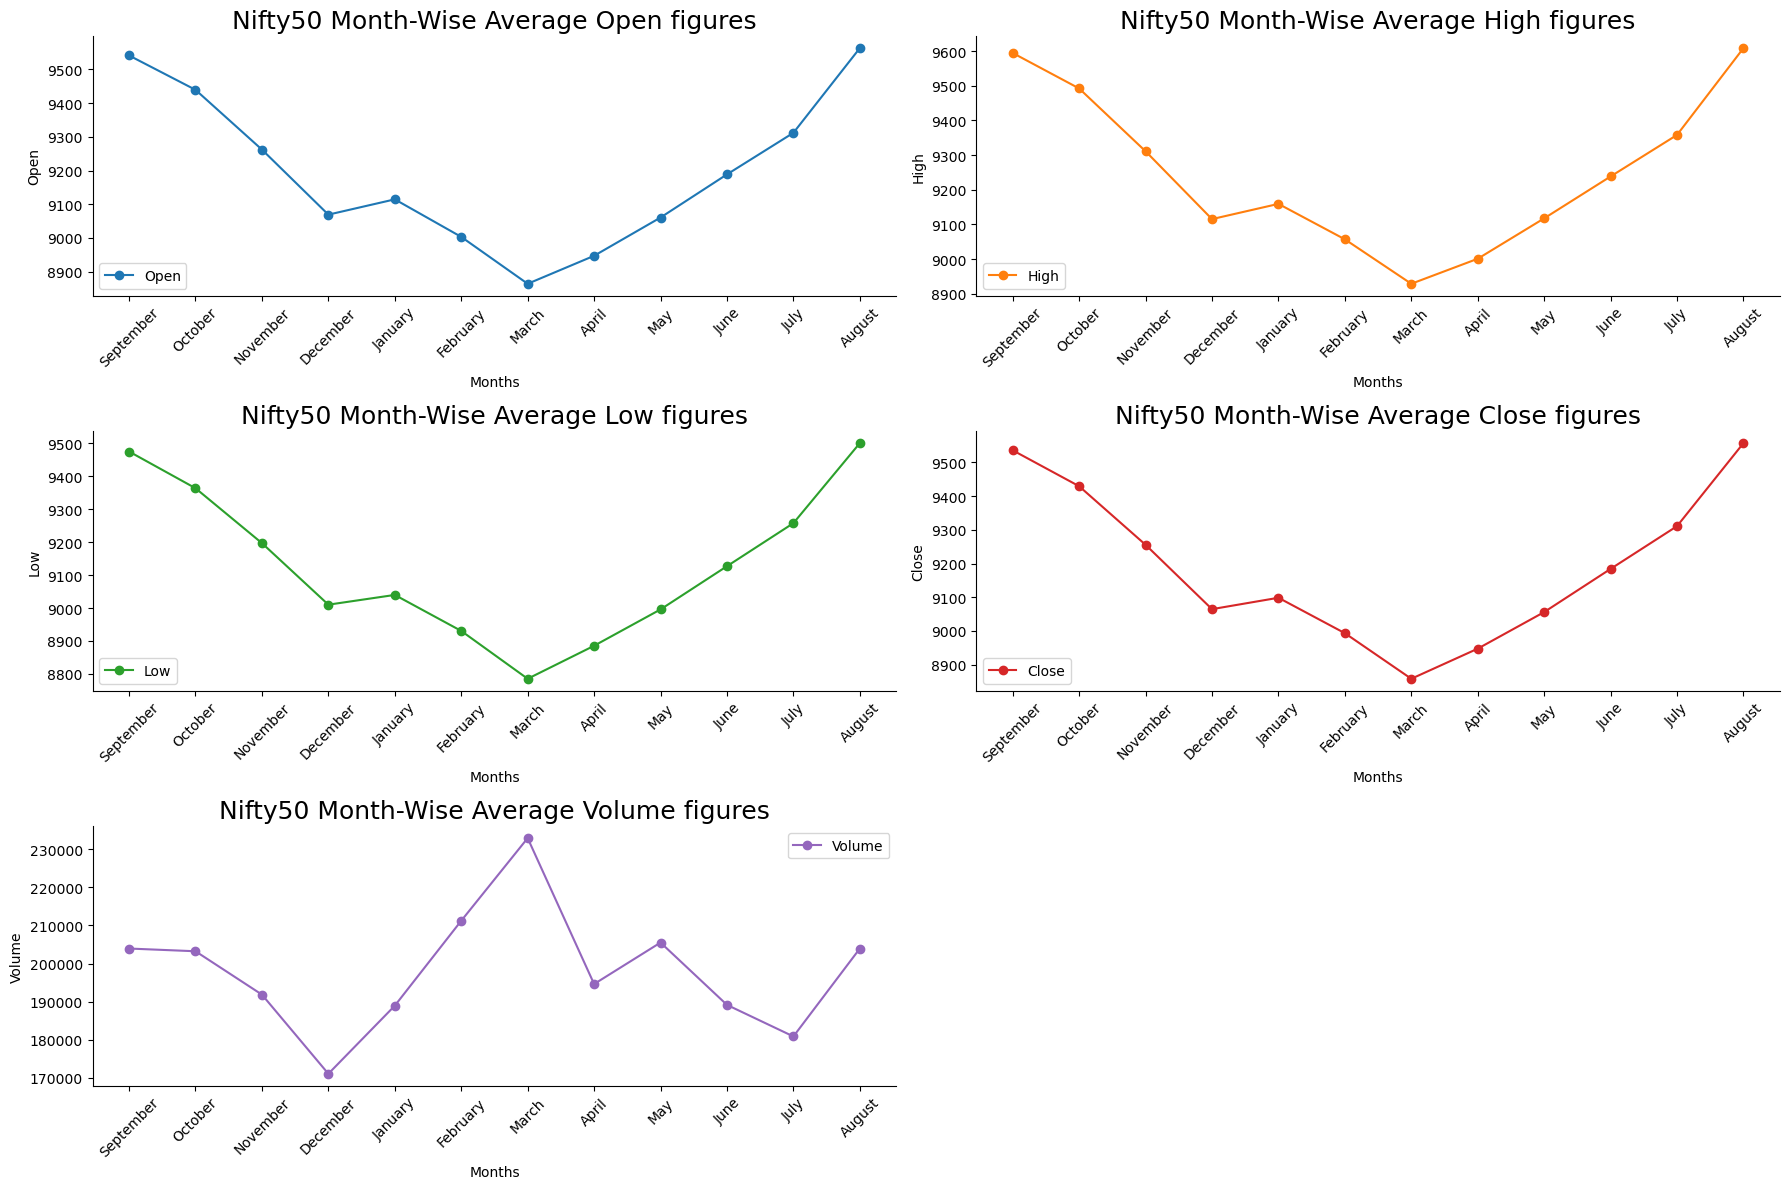

In [28]:
colors = plt.rcParams["axes.prop_cycle"]()
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(18,12))

#Loop through the each column in the dataframe to generate a subplot
for i in range(len(nifty_data.groupby(nifty_data.index.month_name(), sort=False).mean().columns[:])):
    color = next(colors)["color"]
    #Generate a subplot with the given dimensions
    plt.subplot(a, b, c)
    #Plot the data in a line graph, with different colors for each line
    plt.plot(nifty_data.groupby(nifty_data.index.month_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    plt.gca().spines['top'].set_visible(False)   ### removes the top spines of the plot
    plt.gca().spines['right'].set_visible(False)   ### #removes the right spines of the plot
    #Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    #Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Nifty50 Month-Wise Average {nifty_data.groupby(nifty_data.index.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(nifty_data.groupby(nifty_data.index.month_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([nifty_data.groupby(nifty_data.index.month_name(), sort=False).mean().iloc[:, i].name])
    #Increment the subplot counter
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()


We can observe here that the average price significantly decreased in March, while the volume increased.

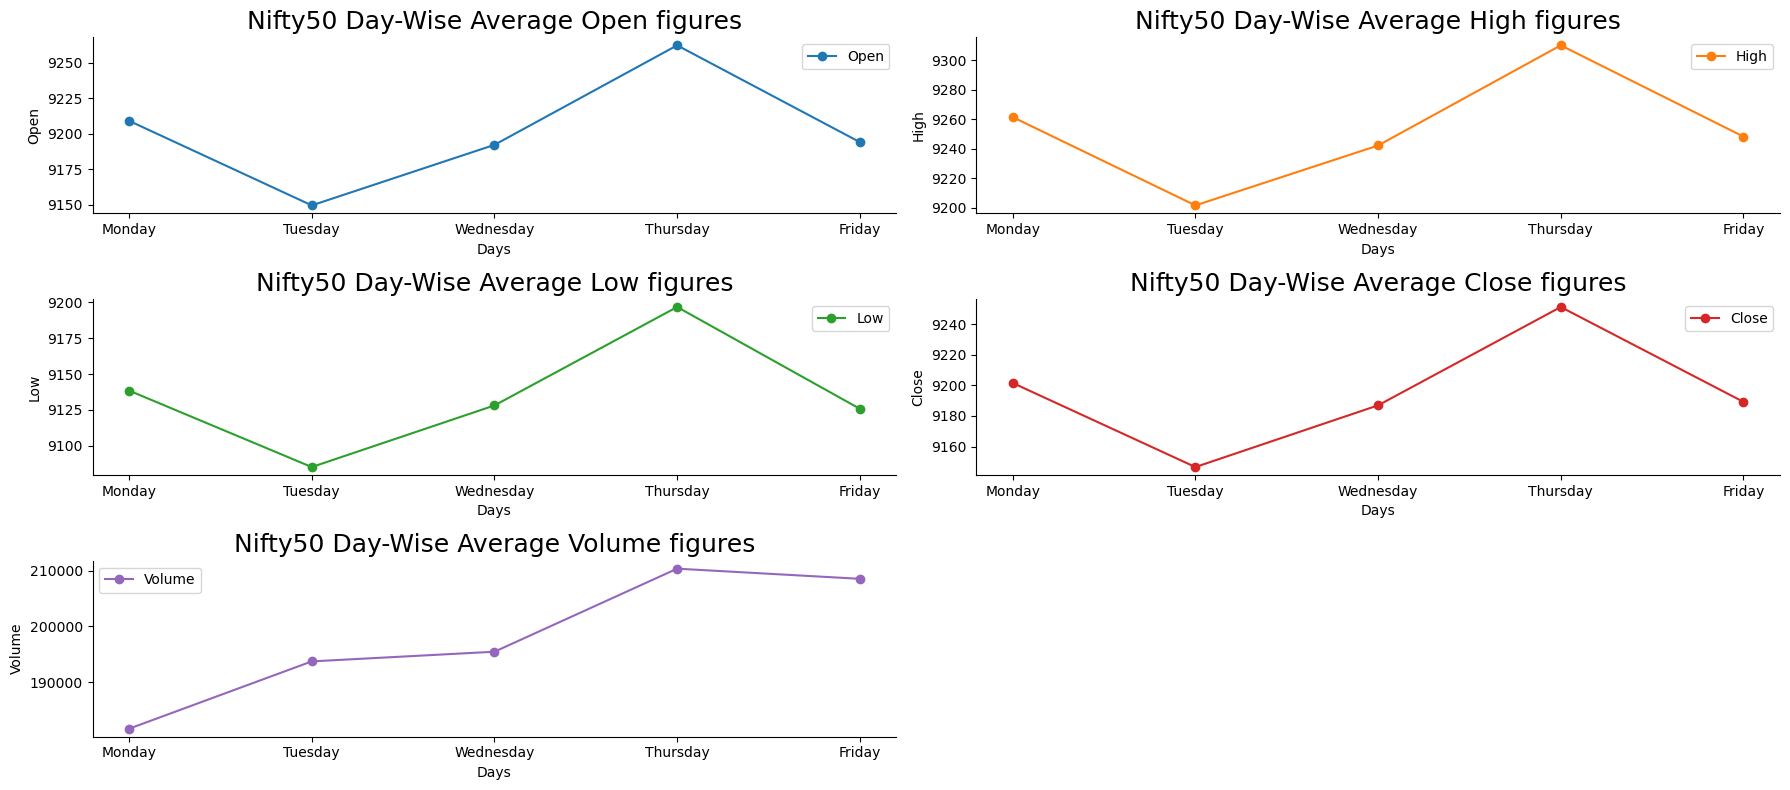

In [29]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(18,8))

for i in range(len(nifty_data.groupby(nifty_data.index.day_name(), sort=False).mean().columns[:])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(nifty_data.groupby(nifty_data.index.day_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=0)
    plt.title(f"Nifty50 Day-Wise Average {nifty_data.groupby(nifty_data.index.day_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Days')
    plt.ylabel(nifty_data.groupby(nifty_data.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([nifty_data.groupby(nifty_data.index.day_name(), sort=False).mean().iloc[:, i].name])
    c = c + 1

plt.tight_layout()
plt.show()

**Observation**: On Thurday the average prices get high where as on Tuesday the average price get low.


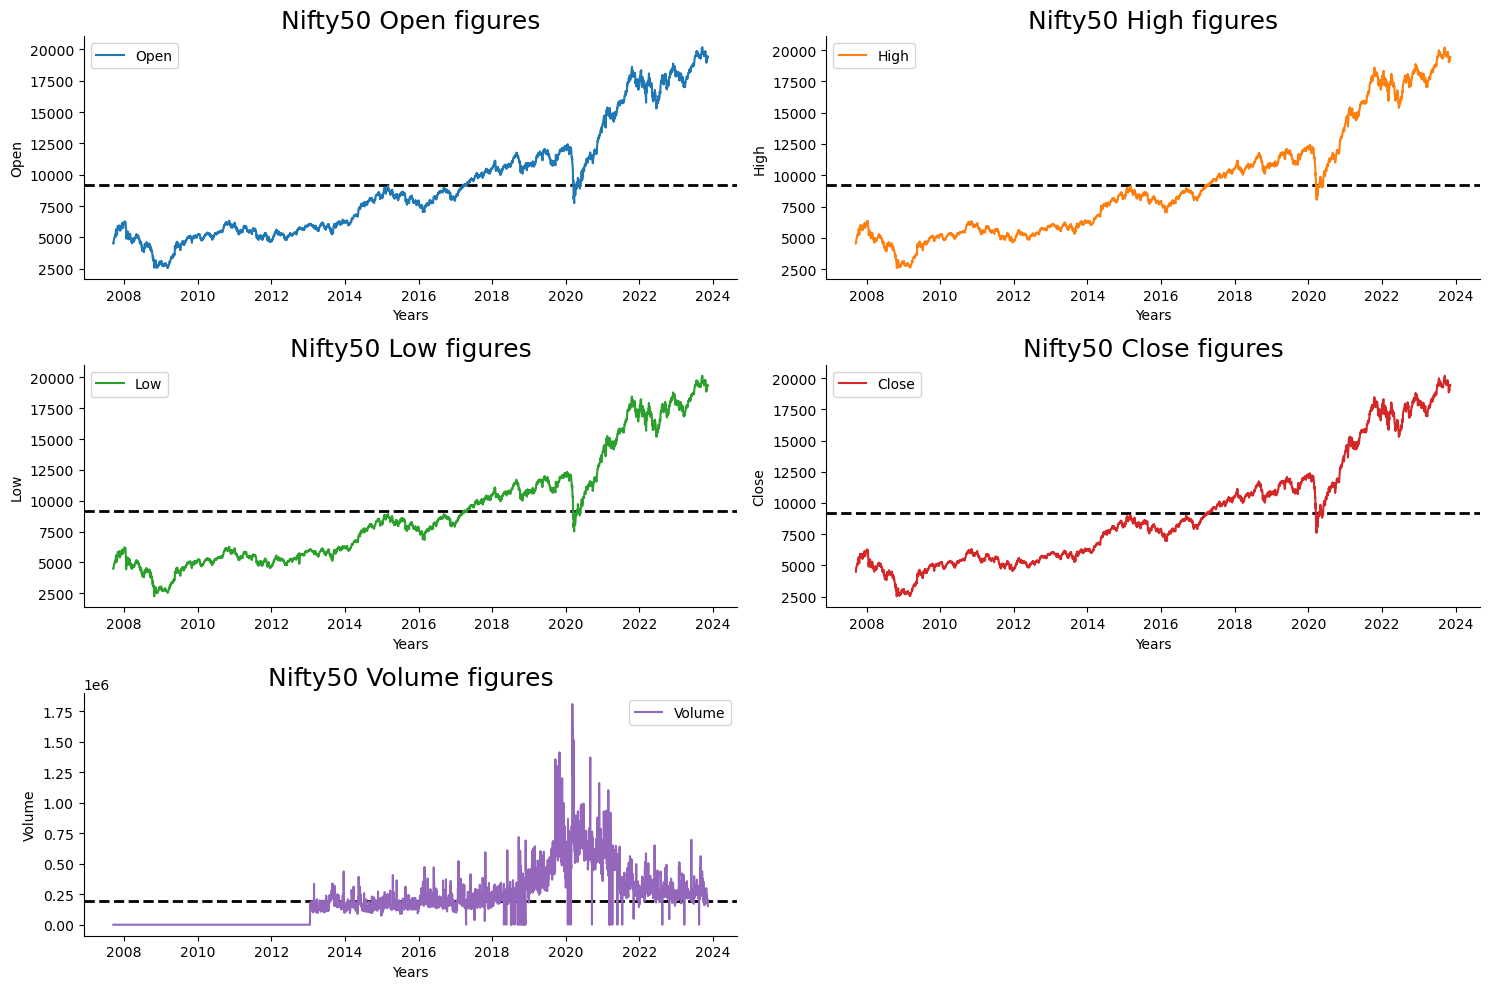

In [30]:
# This code plots open high low and close columns in a dataframe, data_hist.

# The number of rows, columns, and the subplot counter are initialized. 
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized 
fig = plt.figure(figsize=(15,10))

for i in range(len(nifty_data.columns[:])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(nifty_data[nifty_data.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(nifty_data[nifty_data.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Nifty50 "+ nifty_data.columns[i] + " figures", fontsize=18)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(nifty_data.columns[i])
    #Adding Legend
    plt.legend([nifty_data.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

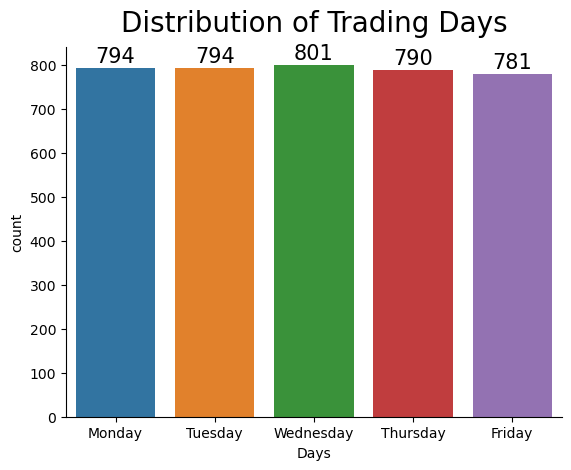

In [31]:
# Creates a countplot using seaborn, with the data being the day of the week from the 'df' dataframe
ax = sns.countplot(nifty_data.index.day_name())

# Removes the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Labels the x-axis
plt.xlabel('Days')

# Adds a title to the plot
plt.title('Distribution of Trading Days', y=1.02, fontsize=20)

# Loops through each bar in the plot and adds an annotation with the height of the bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

# Displays the plot
plt.show()

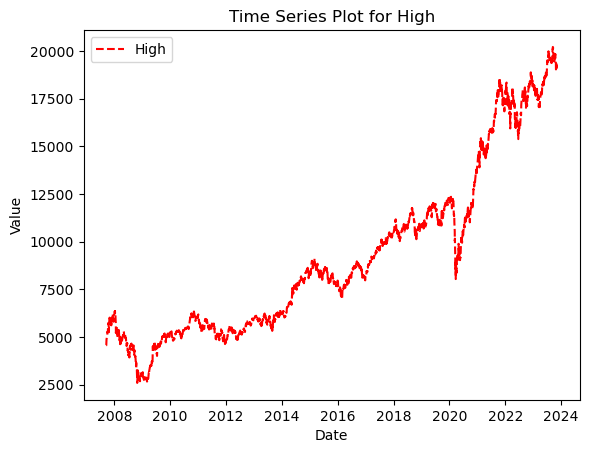

In [32]:
## xlimit and ylimit and colouring
plt.plot(nifty_data['High'], label='High', color='red',ls = '--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot for High')
plt.legend()
plt.show()

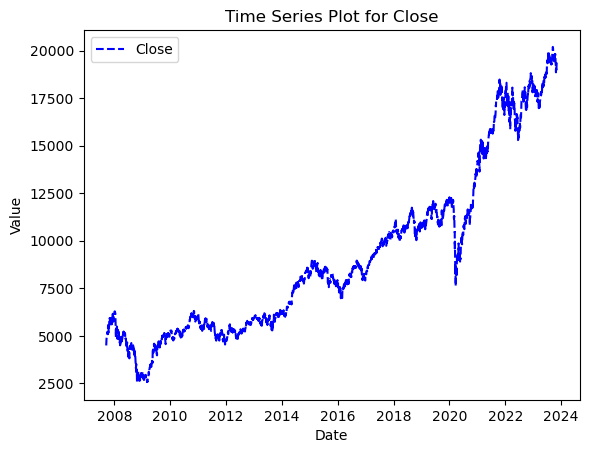

In [33]:
## xlimit and ylimit and colouring
plt.plot(nifty_data['Close'], label='Close', color='blue',ls = '--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot for Close')
plt.legend()
plt.show()

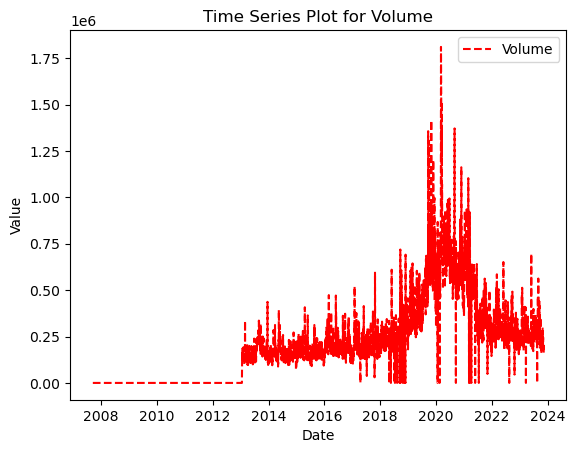

In [34]:
## xlimit and ylimit and colouring
plt.plot(nifty_data['Volume'], label='Volume', color='red',ls = '--')  ## number of data points where volume is 0 (Data Not recorded)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot for Volume')
plt.legend()
plt.show()

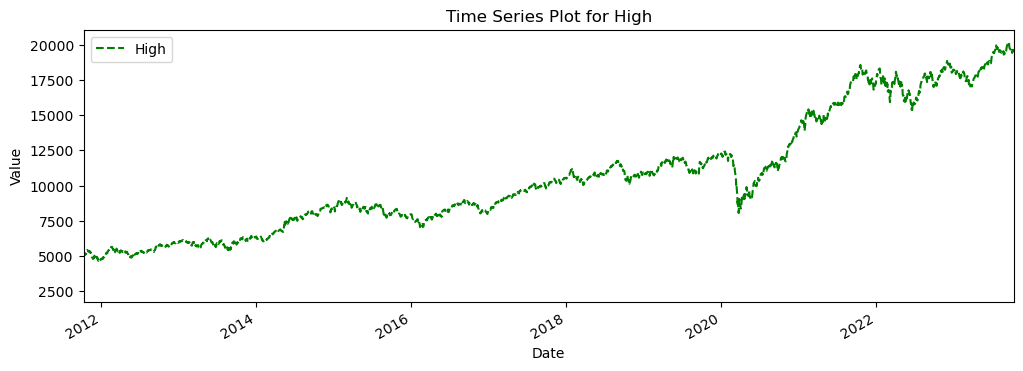

In [35]:
## xlimit and ylimit and colouring
nifty_data['High'].plot(figsize=(12,4), c = 'green', ls = '--' , xlim = ['2011-10-11','2023-10-11'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot for High')
plt.legend()
plt.show()

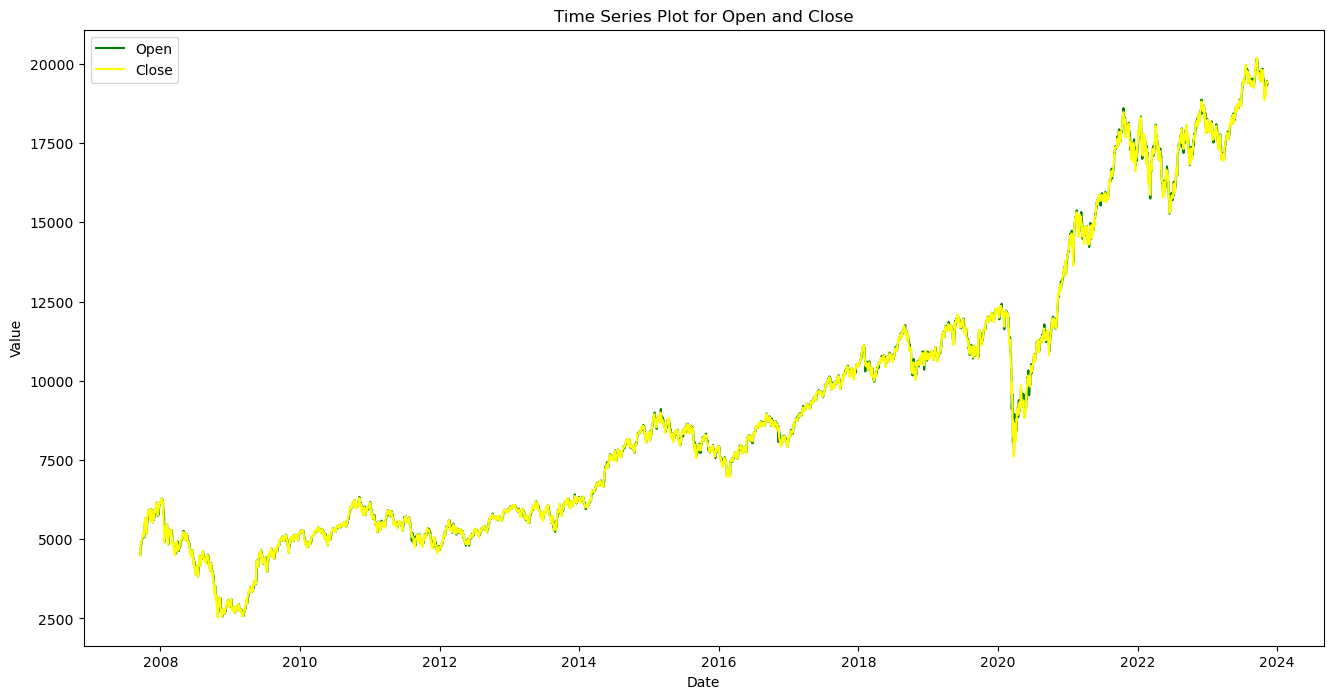

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(nifty_data['Open'], label='Open', color='green')
plt.plot(nifty_data['Close'], label='Close', color='yellow')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot for Open and Close')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Change in High price of nifty50 over time')

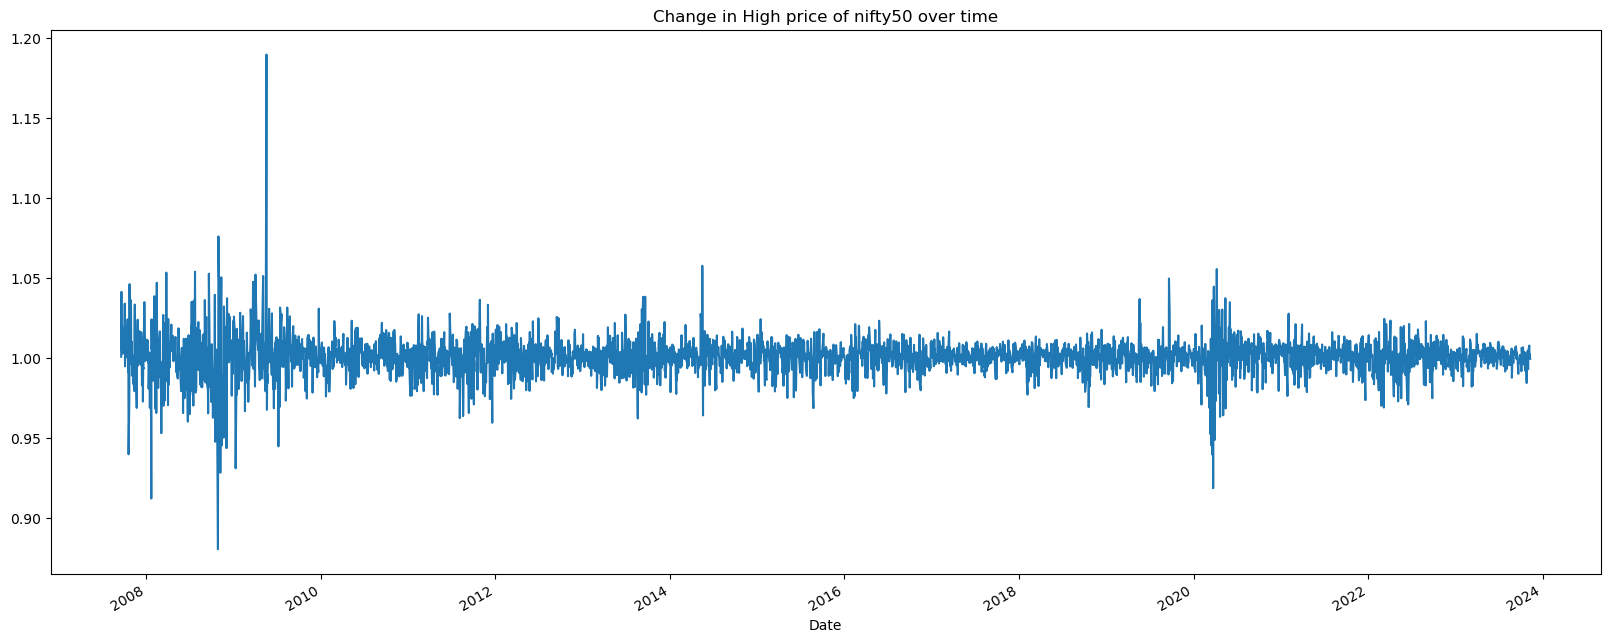

In [37]:
nifty_data['Change'] = nifty_data.High.div(nifty_data.High.shift())
nifty_data['Change'].plot(figsize=(20,8))
plt.title('Change in High price of nifty50 over time')

Text(0.5, 1.0, 'Return based on High price change of nifty50 over time')

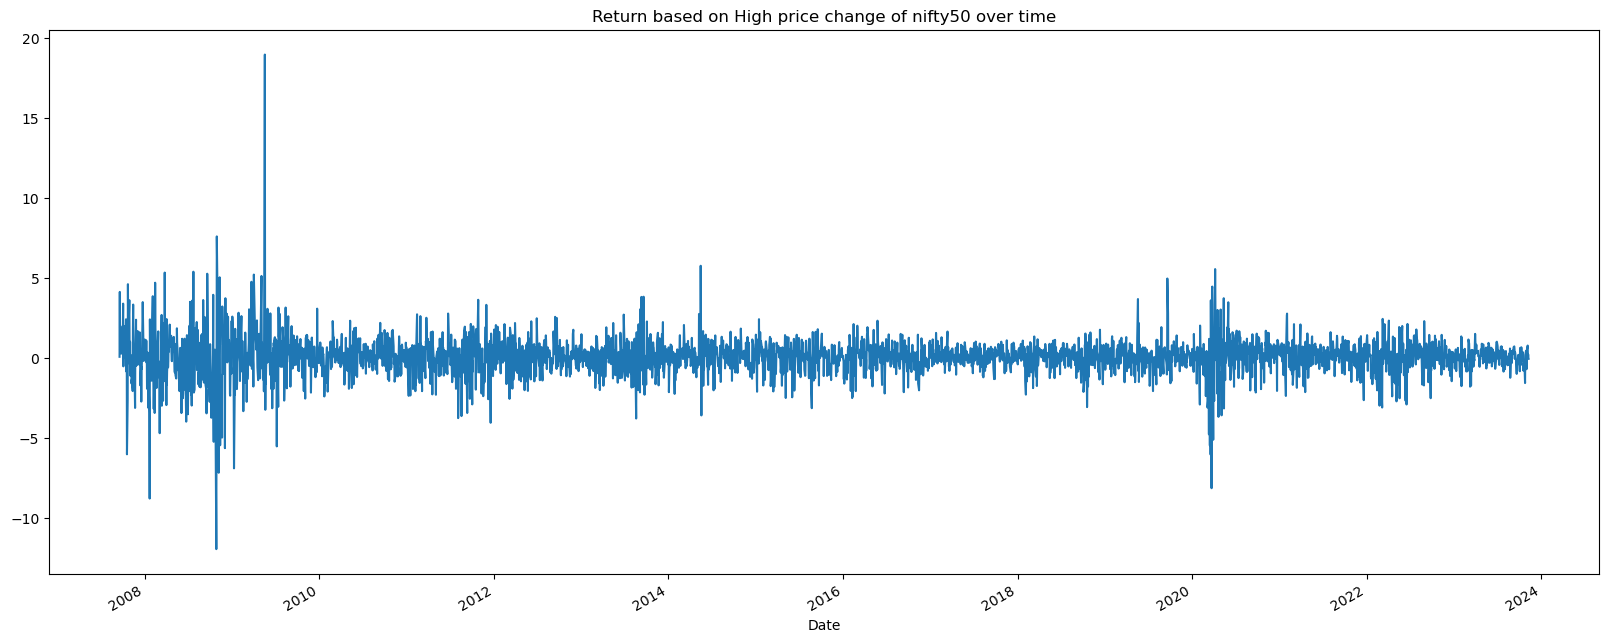

In [38]:
nifty_data['Return'] = nifty_data.Change.sub(1).mul(100)
nifty_data['Return'].plot(figsize=(20,8))
plt.title('Return based on High price change of nifty50 over time')

In [39]:
nifty_data.drop(columns=['Change','Return'],inplace = True)

## Time resampling

In [40]:
## year end frequency
nifty_data.resample(rule = 'A').max()

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,6159.250000,6185.399902,6095.000000,6159.299805,0
2008-12-31,6287.549805,6357.100098,6231.250000,6287.850098,0
2009-12-31,5188.750000,5221.850098,5175.850098,5201.049805,0
2010-12-31,6335.250000,6335.899902,6269.250000,6301.549805,0
2011-12-31,6177.450195,6181.049805,6147.200195,6157.600098,0
2012-12-31,5934.450195,5965.149902,5910.799805,5930.899902,0
2013-12-31,6415.000000,6415.250000,6345.000000,6363.899902,437000
2014-12-31,8605.099609,8626.950195,8545.150391,8588.250000,393200
2015-12-31,9109.150391,9119.200195,8925.549805,8996.250000,407800


In [41]:
nifty_data.resample(rule = 'A').min()

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,4494.100098,4549.049805,4481.549805,4494.649902,0
2008-12-31,2553.600098,2585.300049,2252.750000,2524.199951,0
2009-12-31,2574.500000,2621.250000,2539.449951,2573.149902,0
2010-12-31,4755.350098,4799.049805,4675.399902,4718.649902,0
2011-12-31,4623.149902,4623.149902,4531.149902,4544.200195,0
2012-12-31,4675.799805,4758.700195,4675.799805,4742.799805,0
2013-12-31,5233.450195,5317.700195,5118.850098,5285.000000,0
2014-12-31,5947.600098,6017.799805,5933.299805,6000.899902,75500
2015-12-31,7558.200195,7663.950195,7539.500000,7558.799805,88400


In [42]:
## Quarterly start frequency
nifty_data.resample(rule = 'QS').max()

,Open,High,Low,Close,Volume
Date,,,,,
2007-07-01,4996.450195,5055.799805,4996.450195,5021.350098,0
2007-10-01,6159.250000,6185.399902,6095.000000,6159.299805,0
2008-01-01,6287.549805,6357.100098,6231.250000,6287.850098,0
2008-04-01,5265.299805,5298.850098,5197.600098,5228.200195,0
2008-07-01,4620.950195,4649.850098,4529.350098,4620.399902,0
...,...,...,...,...,...
2022-10-01,18871.949219,18887.599609,18778.199219,18812.500000,378500
2023-01-01,18230.650391,18251.949219,18149.800781,18232.550781,512900
2023-04-01,19076.849609,19201.699219,19024.599609,19189.050781,696500


In [43]:
## Business year end frequency
nifty_data.resample(rule = 'BA').max()

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,6159.250000,6185.399902,6095.000000,6159.299805,0
2008-12-31,6287.549805,6357.100098,6231.250000,6287.850098,0
2009-12-31,5188.750000,5221.850098,5175.850098,5201.049805,0
2010-12-31,6335.250000,6335.899902,6269.250000,6301.549805,0
2011-12-30,6177.450195,6181.049805,6147.200195,6157.600098,0
2012-12-31,5934.450195,5965.149902,5910.799805,5930.899902,0
2013-12-31,6415.000000,6415.250000,6345.000000,6363.899902,437000
2014-12-31,8605.099609,8626.950195,8545.150391,8588.250000,393200
2015-12-31,9109.150391,9119.200195,8925.549805,8996.250000,407800


In [44]:
## Business Quarter start frequency
nifty_data.resample(rule = 'BQS').max()

,Open,High,Low,Close,Volume
Date,,,,,
2007-07-02,4996.450195,5055.799805,4996.450195,5021.350098,0
2007-10-01,6159.250000,6185.399902,6095.000000,6159.299805,0
2008-01-01,6287.549805,6357.100098,6231.250000,6287.850098,0
2008-04-01,5265.299805,5298.850098,5197.600098,5228.200195,0
2008-07-01,4620.950195,4649.850098,4529.350098,4620.399902,0
...,...,...,...,...,...
2022-10-03,18871.949219,18887.599609,18778.199219,18812.500000,378500
2023-01-02,18230.650391,18251.949219,18149.800781,18232.550781,512900
2023-04-03,19076.849609,19201.699219,19024.599609,19189.050781,696500


In [45]:
## finding the maximum value for each month
nifty_data.resample(rule = 'M').max()

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-30,4996.450195,5055.799805,4996.450195,5021.350098,0
2007-10-31,5917.549805,5976.000000,5861.299805,5905.899902,0
2007-11-30,5942.700195,6011.950195,5895.649902,5937.899902,0
2007-12-31,6159.250000,6185.399902,6095.000000,6159.299805,0
2008-01-31,6287.549805,6357.100098,6231.250000,6287.850098,0
...,...,...,...,...,...
2023-07-31,19850.900391,19991.849609,19758.400391,19979.150391,369700
2023-08-31,19784.000000,19795.599609,19704.599609,19733.550781,562600
2023-09-30,20156.449219,20222.449219,20129.699219,20192.349609,438200


<AxesSubplot:xlabel='Date'>

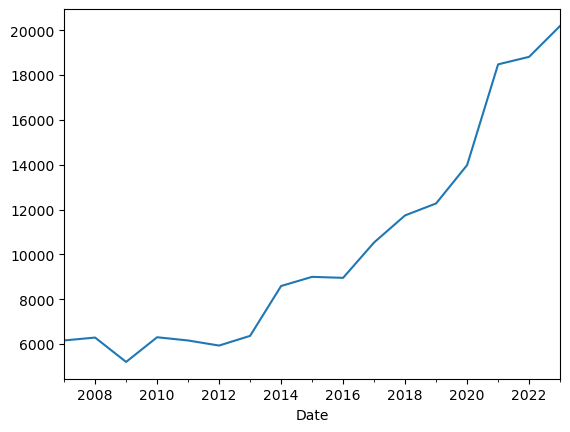

In [46]:
nifty_data.resample(rule = 'A').max()['Close'].plot()

<AxesSubplot:xlabel='Date'>

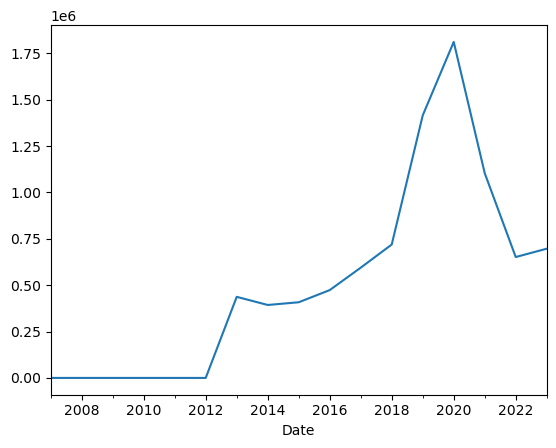

In [47]:
nifty_data.resample(rule = 'A').max()['Volume'].plot()

<AxesSubplot:xlabel='Date'>

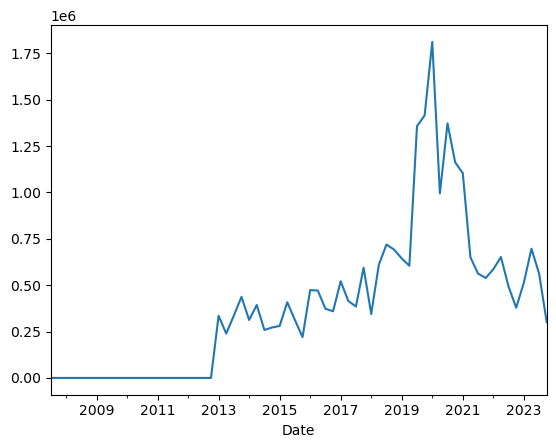

In [48]:
nifty_data.resample(rule = 'QS').max()['Volume'].plot()

<AxesSubplot:xlabel='Date'>

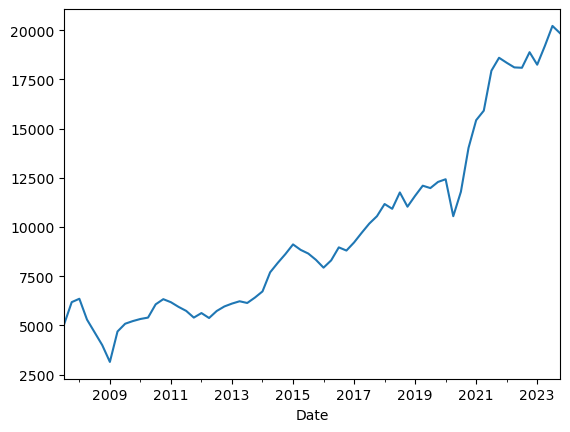

In [49]:
nifty_data.resample(rule = 'QS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

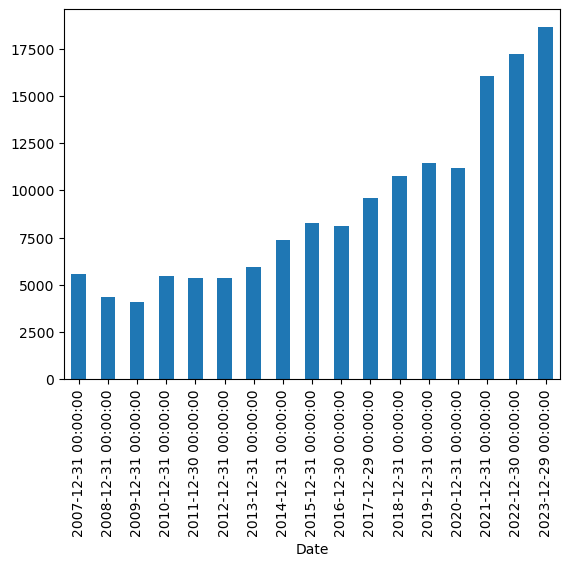

In [50]:
nifty_data['Open'].resample(rule = 'BA').mean().plot(kind = 'bar')

In [51]:
nifty_data['High'].rolling(10).mean().head(20)

Date
2007-09-17            NaN
2007-09-18            NaN
2007-09-19            NaN
2007-09-20            NaN
2007-09-21            NaN
2007-09-24            NaN
2007-09-25            NaN
2007-09-26            NaN
2007-09-27            NaN
2007-09-28    4840.449951
2007-10-01    4894.474951
2007-10-03    4965.429980
2007-10-04    5014.839990
2007-10-05    5063.609961
2007-10-08    5102.969922
2007-10-09    5143.724951
2007-10-10    5193.804980
2007-10-11    5248.994971
2007-10-12    5302.284961
2007-10-15    5364.969971
Name: High, dtype: float64

In [52]:
nifty_data['High : 30 days rolling'] = nifty_data['High'].rolling(30).mean()

In [53]:
nifty_data.head(31)

,Open,High,Low,Close,Volume,High : 30 days rolling
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,NaN
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,NaN
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,NaN
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,NaN
2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,0,NaN
2007-09-25,4939.100098,4953.899902,4878.149902,4938.850098,0,NaN
2007-09-26,4937.600098,4980.850098,4930.350098,4940.500000,0,NaN
2007-09-27,4942.700195,5016.399902,4942.700195,5000.549805,0,NaN


<AxesSubplot:xlabel='Date'>

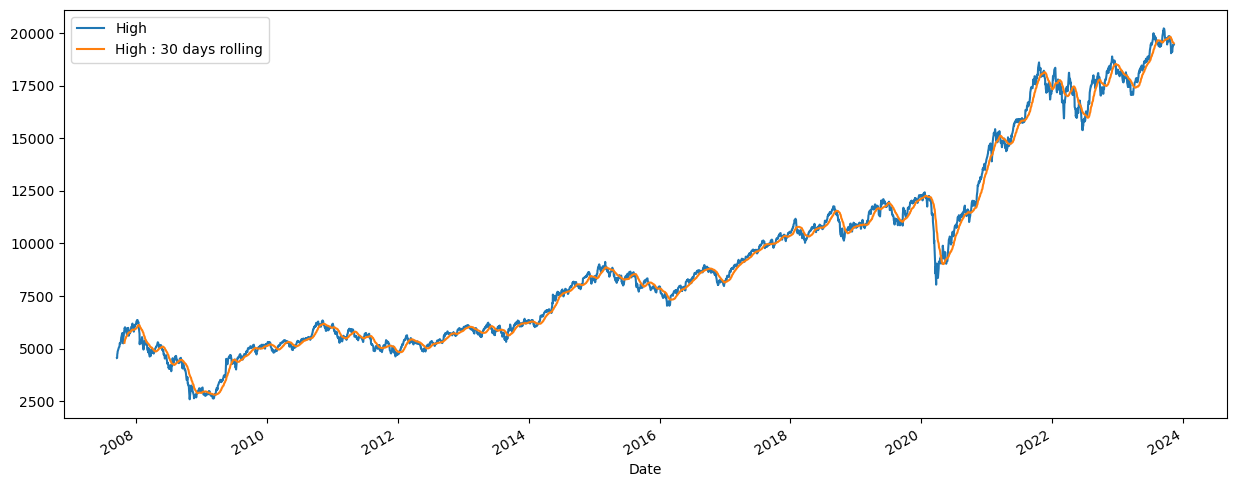

In [54]:
nifty_data[['High', 'High : 30 days rolling']].plot(figsize = (15,6))

In [55]:
nifty_data['High : 30 days rolling'] = nifty_data['High'].rolling(30, min_periods = 1).mean()

Text(0.5, 1.0, 'Comparing High price and rolling High price of nifty50 over time')

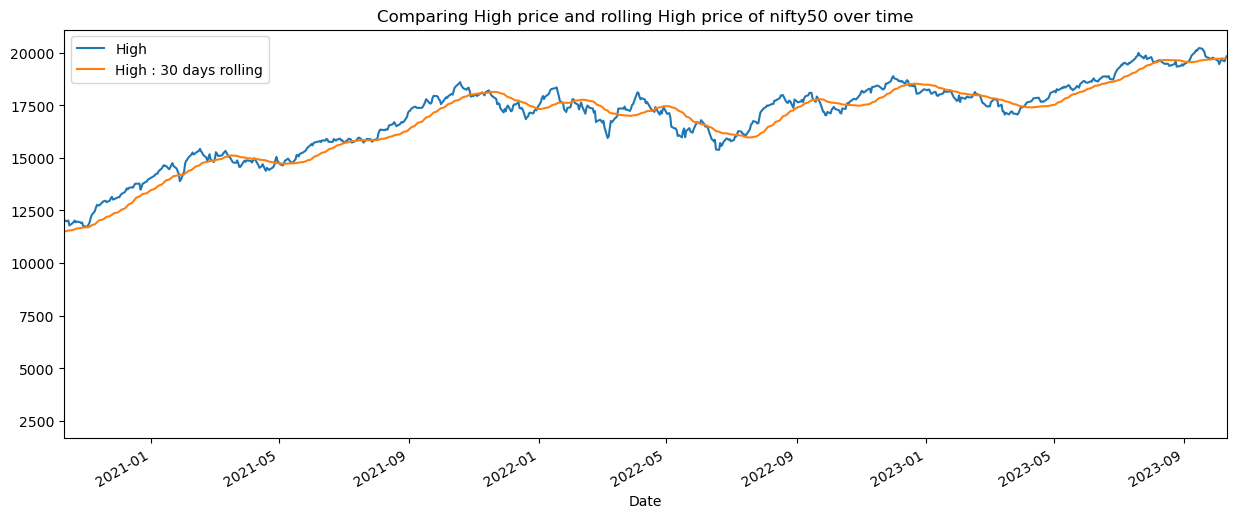

In [56]:
nifty_data[['High', 'High : 30 days rolling']].plot(xlim = ['2020-10-11','2023-10-11'],figsize = (15,6))
plt.title('Comparing High price and rolling High price of nifty50 over time')

In [57]:
nifty_data['Open : 10 days rolling'] = nifty_data['Open'].rolling(10, min_periods = 1).mean()
nifty_data['Open : 30 days rolling'] = nifty_data['Open'].rolling(30, min_periods = 1).mean()
nifty_data['Open : 50 days rolling'] = nifty_data['Open'].rolling(50, min_periods = 1).mean()
nifty_data['Open : 100 days rolling'] = nifty_data['Open'].rolling(100, min_periods = 1).mean()

Text(0.5, 1.0, 'Comparing Open price and rolling Open price of nifty50 over time')

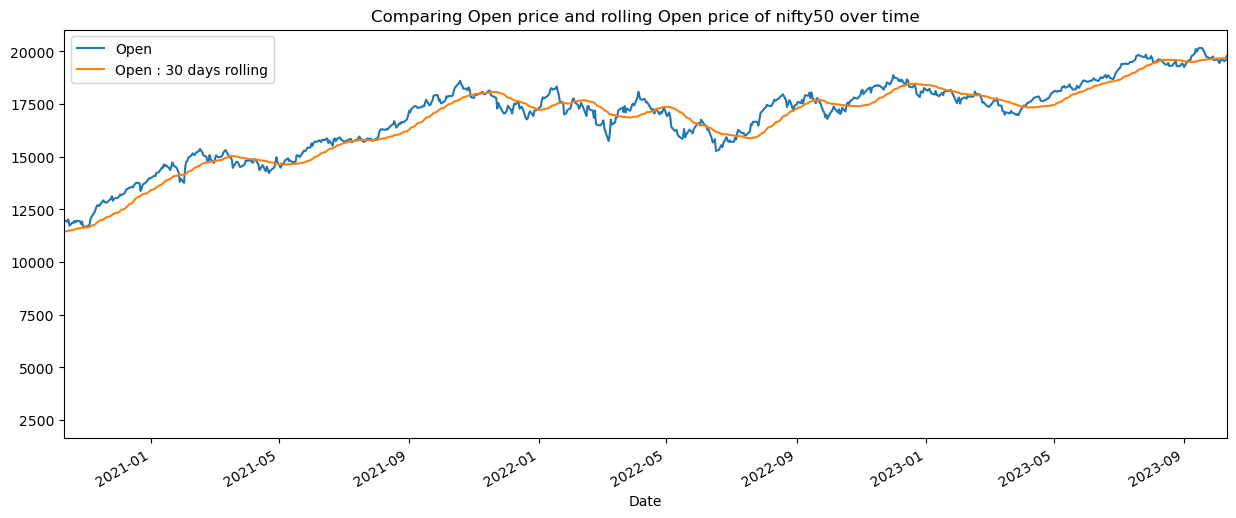

In [58]:
nifty_data[['Open', 'Open : 30 days rolling']].plot(xlim = ['2020-10-11','2023-10-11'],figsize = (15,6))
plt.title('Comparing Open price and rolling Open price of nifty50 over time')

Text(0.5, 1.0, 'Comparing Open price and rolling Open price of nifty50 over time')

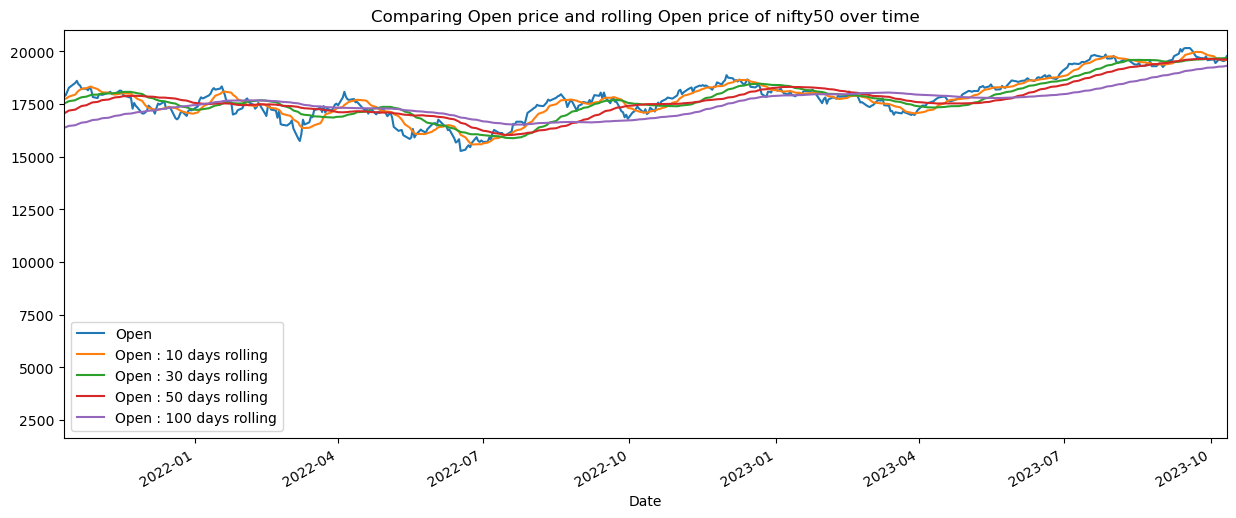

In [59]:
nifty_data[['Open', 'Open : 10 days rolling','Open : 30 days rolling','Open : 50 days rolling','Open : 100 days rolling']].plot(xlim = ['2021-10-11','2023-10-11'],figsize = (15,6))
plt.title('Comparing Open price and rolling Open price of nifty50 over time')

In [60]:
nifty_data['Close : 10 days rolling'] = nifty_data['Close'].rolling(10, min_periods = 1).mean()
nifty_data['Close : 30 days rolling'] = nifty_data['Close'].rolling(30, min_periods = 1).mean()
nifty_data['Close : 50 days rolling'] = nifty_data['Close'].rolling(50, min_periods = 1).mean()
nifty_data['Close : 100 days rolling'] = nifty_data['Close'].rolling(100, min_periods = 1).mean()

Text(0.5, 1.0, 'Comparing Close price and rolling Close price of nifty50 over time')

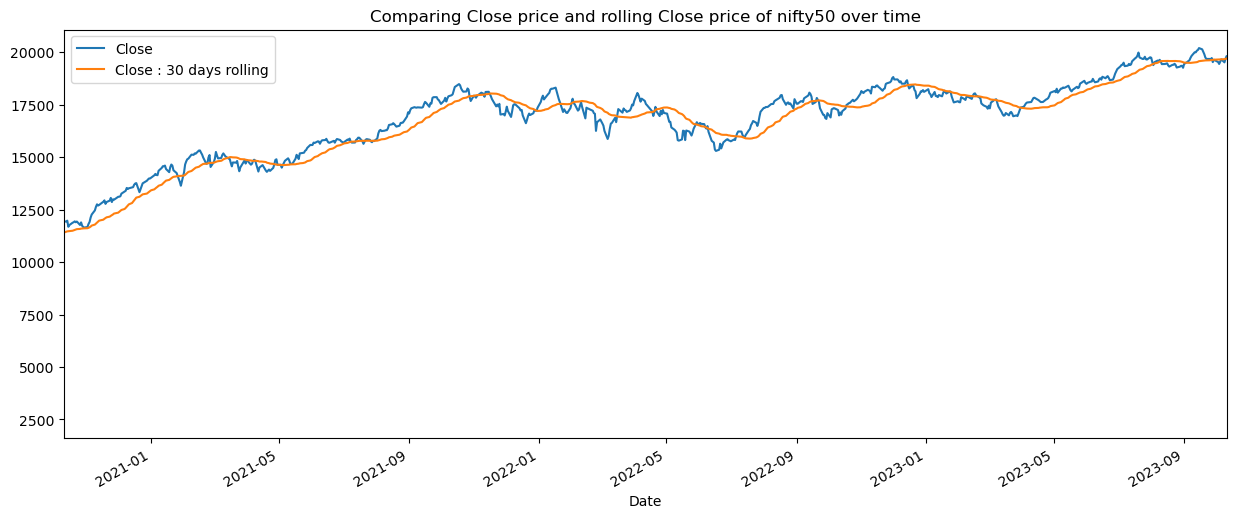

In [64]:
nifty_data[['Close', 'Close : 30 days rolling']].plot(xlim = ['2020-10-11','2023-10-11'],figsize = (15,6))
plt.title('Comparing Close price and rolling Close price of nifty50 over time')

Text(0.5, 1.0, 'Comparing Close price and rolling Close price of nifty50 over time')

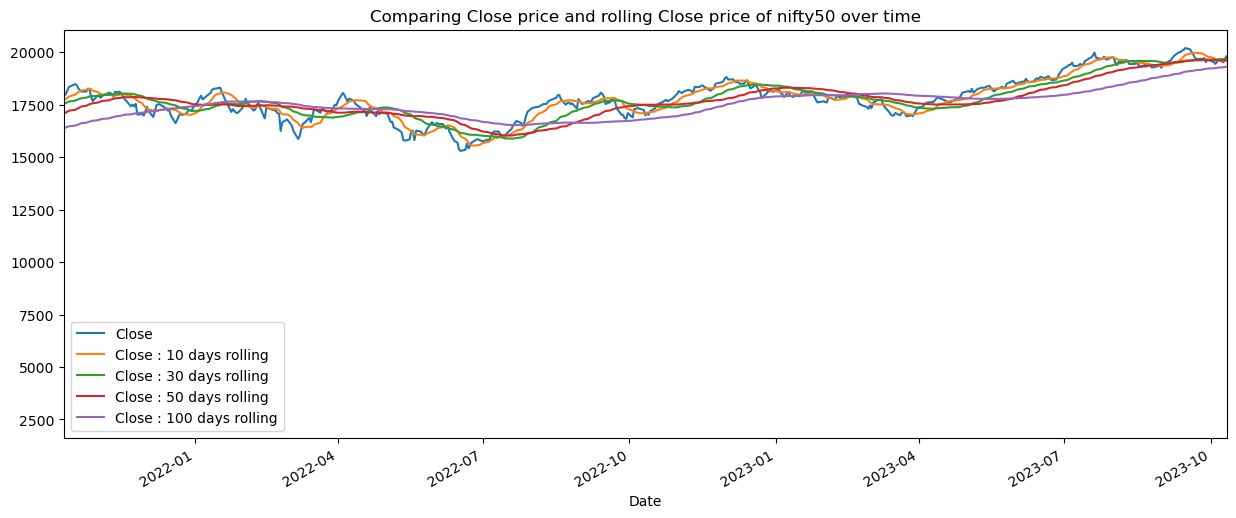

In [65]:
nifty_data[['Close', 'Close : 10 days rolling','Close : 30 days rolling','Close : 50 days rolling','Close : 100 days rolling']].plot(xlim = ['2021-10-11','2023-10-11'],figsize = (15,6))
plt.title('Comparing Close price and rolling Close price of nifty50 over time')
## rolling mean plot is a smoother version of the original plot.

<AxesSubplot:xlabel='Date'>

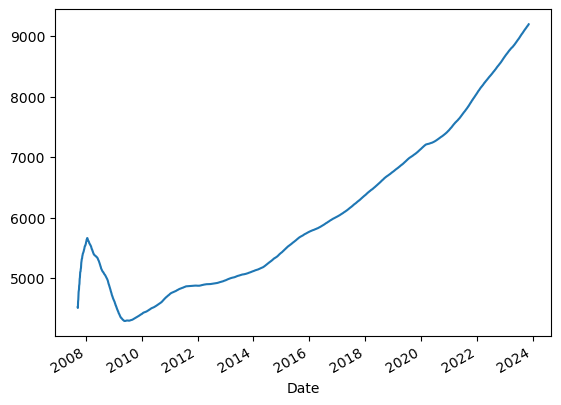

In [66]:
## Expanding

## Cumulative Moving Average

nifty_data['Open'].expanding().mean().plot()

In [67]:
## multiplier = 2/(length of window + 1)
## Exponential Moving Average 
## EMA = ((Close - Prev EMA)* multiplier)+ Prev EMA

In [68]:
nifty_data['EMA_0.1'] = nifty_data['Open'].ewm(alpha = 0.1, adjust = False).mean()
nifty_data['EMA_0.3'] = nifty_data['Open'].ewm(alpha = 0.3, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

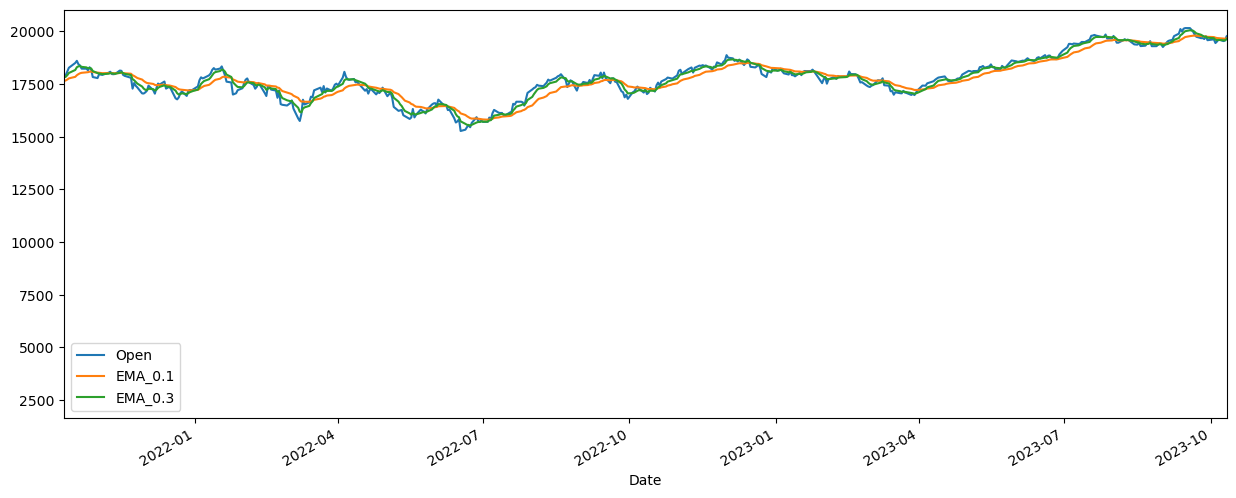

In [69]:
nifty_data[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim = ['2021-10-11','2023-10-11'],figsize = (15,6))

In [70]:
## Exponential Weighted Moving Average
## smoothing factor = 0.1

nifty_data['EMA_5days'] = nifty_data['Open'].ewm(span = 5).mean()

<AxesSubplot:xlabel='Date'>

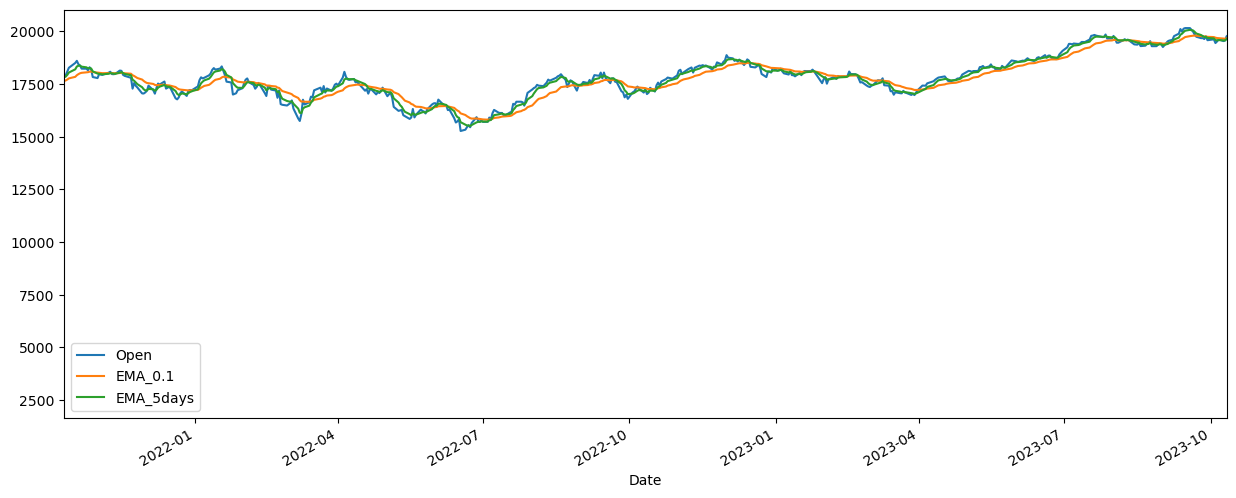

In [71]:
nifty_data[['Open', 'EMA_0.1', 'EMA_5days']].plot(xlim = ['2021-10-11','2023-10-11'],figsize = (15,6))

## Verifying the presence of trend and seasonality

In [73]:
data = nifty_data
# Extract columns

Open_price = data['Open']
Close_price = data['Close']
Low_price = data['Low']
High_price = data['High']
n = nifty_data.shape[0]

# Test for randomness
## Close
u = 0
for i in range(1, n-1):
    if ((Close_price[i] > Close_price[i+1] and Close_price[i] > Close_price[i-1]) or
            (Close_price[i] < Close_price[i+1] and Close_price[i] < Close_price[i-1])):
        u += 1

e_u = 2 * (n - 2) / 3   
v_u = (16 * n - 29) / 90
z = (u - e_u) / np.sqrt(v_u)


print("u:", u)   # turning points
print("z:", z)    # critical value

u: 1847
z: -29.84389072672874


In [74]:
n*(n-1)/4

3919410.0

In [75]:
# Test for the presence of trend - Relative Ordering Test
q = 0
Close = nifty_data["Close"]
# Concordant pairs
for i in range(n-1):
    for j in range(i+1, n):
        if Close[i] > Close[j]:
            q += 1

print("q:", q)    ##  No of concordant 

# Expected number of concordant pairs
Expecq = n * (n - 1) / 4

# Calculate tou, V_tou, and Z
tou = 1 - 4 * q / (n * (n - 1))   ## kendal tau correlation coefficient
V_tou = 2 * (2 * n + 5) / (9 * n * (n - 1))  ## variance of tau
Z = tou / np.sqrt(V_tou)

print("tou:", tou)   ## kendall tau
print("V_tou:", V_tou)
print("Z:", Z)    ## observed critical value


q: 586197
tou: 0.8504374382879056
V_tou: 0.00011233266684980081
Z: 80.2397073205495


**Conclusion**: The value of $\tau$  is 0.8504 which is positive suggest a slightly positive trend and the $Z$ value is greater than 1.96. Thus we can say it is significant at 0.05 significance level.

In [76]:
## High 
data = nifty_data
# Extract columns

Open_price = data['Open']
Close_price = data['Close']
Low_price = data['Low']
High_price = data['High']
n = nifty_data.shape[0]

# Test for randomness
u = 0
for i in range(1, n-1):
    if ((High_price[i] > High_price[i+1] and High_price[i] > High_price[i-1]) or
            (High_price[i] < High_price[i+1] and High_price[i] < High_price[i-1])):
        u += 1

e_u = 2 * (n - 2) / 3   
v_u = (16 * n - 29) / 90
z = (u - e_u) / np.sqrt(v_u)

print("u:", u)   # turning points
print("z:", z)    # critical value

u: 1685
z: -35.950893208071975


In [77]:
# Test for the presence of trend - Relative Ordering Test
q = 0
High = nifty_data["High"]
# Concordant pairs
for i in range(n-1):
    for j in range(i+1, n):
        if High[i] > High[j]:
            q += 1

print("q:", q)    ##  No of concordant 

# Expected number of concordant pairs
Expecq = n * (n - 1) / 4

# Calculate tou, V_tou, and Z
tou = 1 - 4 * q / (n * (n - 1))   ## kendal tau correlation coefficient
V_tou = 2 * (2 * n + 5) / (9 * n * (n - 1))  ## variance of tau
Z = tou / np.sqrt(V_tou)

print("tou:", tou)   ## kendall tau
print("V_tou:", V_tou)
print("Z:", Z)    ## observed critical value

q: 588506
tou: 0.8498483190071975
V_tou: 0.00011233266684980081
Z: 80.18412326870428


In [78]:
## Low 
data = nifty_data
# Extract columns

Open_price = data['Open']
Close_price = data['Close']
Low_price = data['Low']
High_price = data['High']
n = nifty_data.shape[0]

# Test for randomness
u = 0
for i in range(1, n-1):
    if ((Low_price[i] > Low_price[i+1] and Low_price[i] > Low_price[i-1]) or
            (Low_price[i] < Low_price[i+1] and Low_price[i] < Low_price[i-1])):
        u += 1

e_u = 2 * (n - 2) / 3   
v_u = (16 * n - 29) / 90
z = (u - e_u) / np.sqrt(v_u)

print("u:", u)   # turning points
print("z:", z)    # critical value

u: 1664
z: -36.74254167787572


In [79]:
# Test for the presence of trend - Relative Ordering Test
q = 0
Low = nifty_data["Low"]
# Concordant pairs
for i in range(n-1):
    for j in range(i+1, n):
        if Low[i] > Low[j]:
            q += 1

print("q:", q)    ##  No of concordant 

# Expected number of concordant pairs
Expecq = n * (n - 1) / 4

# Calculate tou, V_tou, and Z
tou = 1 - 4 * q / (n * (n - 1))   ## kendal tau correlation coefficient
V_tou = 2 * (2 * n + 5) / (9 * n * (n - 1))  ## variance of tau
Z = tou / np.sqrt(V_tou)

print("tou:", tou)   ## kendall tau
print("V_tou:", V_tou)
print("Z:", Z)    ## observed critical value

q: 584264
tou: 0.8509306247624004
V_tou: 0.00011233266684980081
Z: 80.28624000665465


In [80]:
## Open 
data = nifty_data
# Extract columns

Open_price = data['Open']
Close_price = data['Close']
Low_price = data['Low']
High_price = data['High']
n = nifty_data.shape[0]

# Test for randomness
u = 0
for i in range(1, n-1):
    if ((Open_price[i] > Open_price[i+1] and Open_price[i] > Open_price[i-1]) or
            (Open_price[i] < Open_price[i+1] and Open_price[i] < Open_price[i-1])):
        u += 1

e_u = 2 * (n - 2) / 3   
v_u = (16 * n - 29) / 90
z = (u - e_u) / np.sqrt(v_u)

print("u:", u)   # turning points
print("z:", z)    # critical value

u: 1958
z: -25.659463100623196


In [81]:
# Test for the presence of trend - Relative Ordering Test
q = 0
Open = nifty_data["Open"]
# Concordant pairs
for i in range(n-1):
    for j in range(i+1, n):
        if Open[i] > Open[j]:
            q += 1

print("q:", q)    ##  No of concordant 

# Expected number of concordant pairs
Expecq = n * (n - 1) / 4

# Calculate tou, V_tou, and Z
tou = 1 - 4 * q / (n * (n - 1))   ## kendal tau correlation coefficient
V_tou = 2 * (2 * n + 5) / (9 * n * (n - 1))  ## variance of tau
Z = tou / np.sqrt(V_tou)

print("tou:", tou)   ## kendall tau
print("V_tou:", V_tou)
print("Z:", Z)    ## observed critical value

q: 586881
tou: 0.850262922225539
V_tou: 0.00011233266684980081
Z: 80.22324153819257


## Seasonal Decomposition of the Series

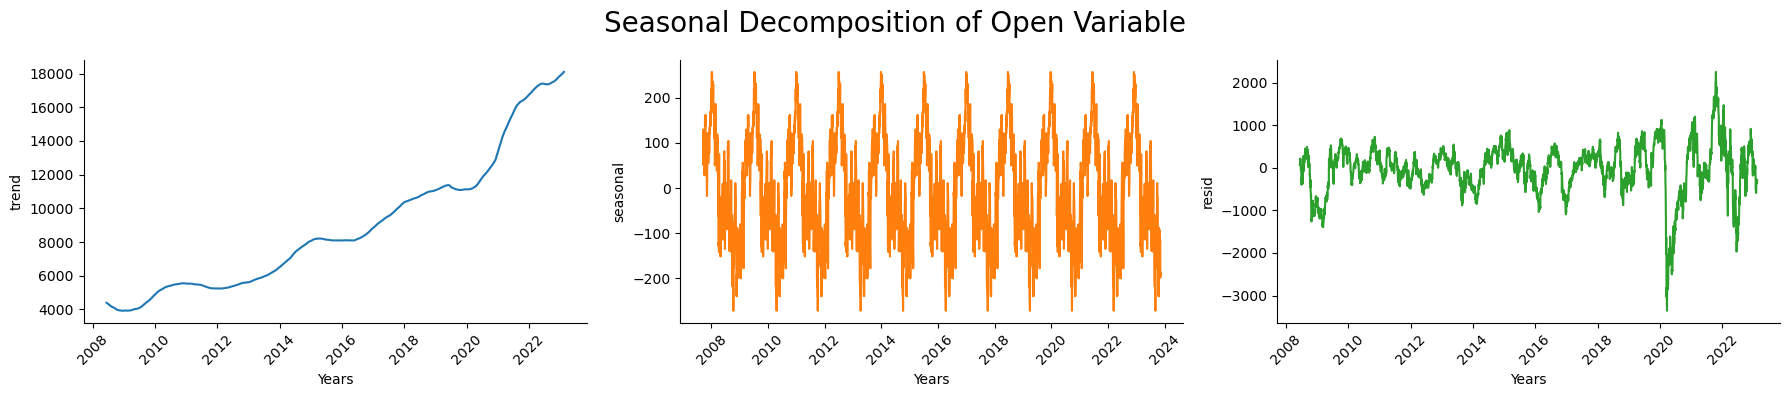

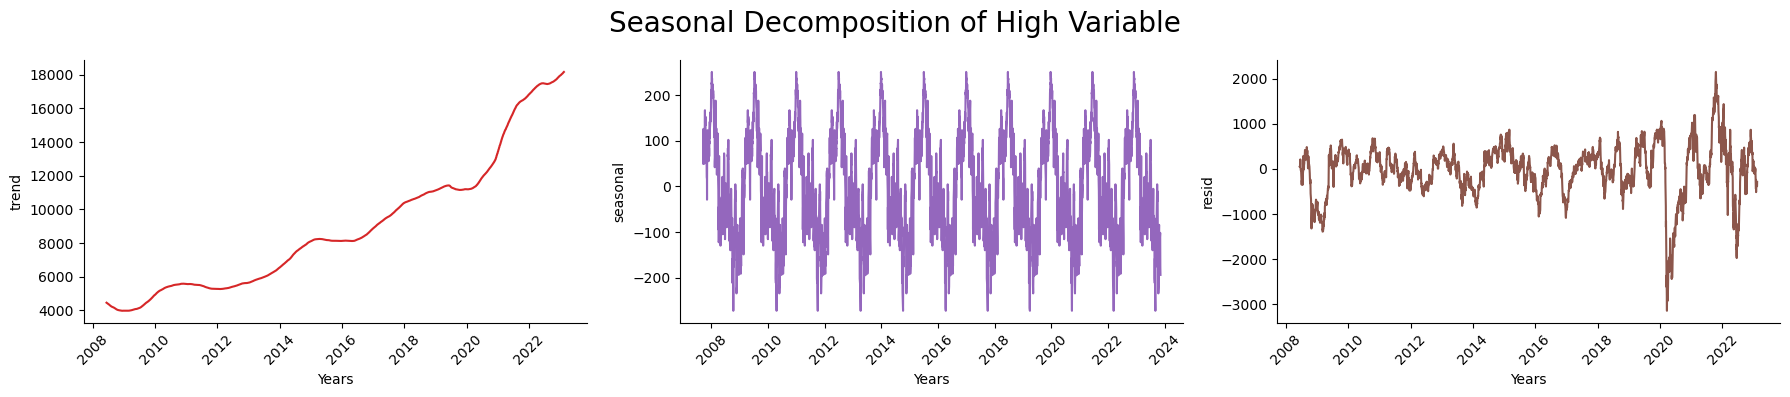

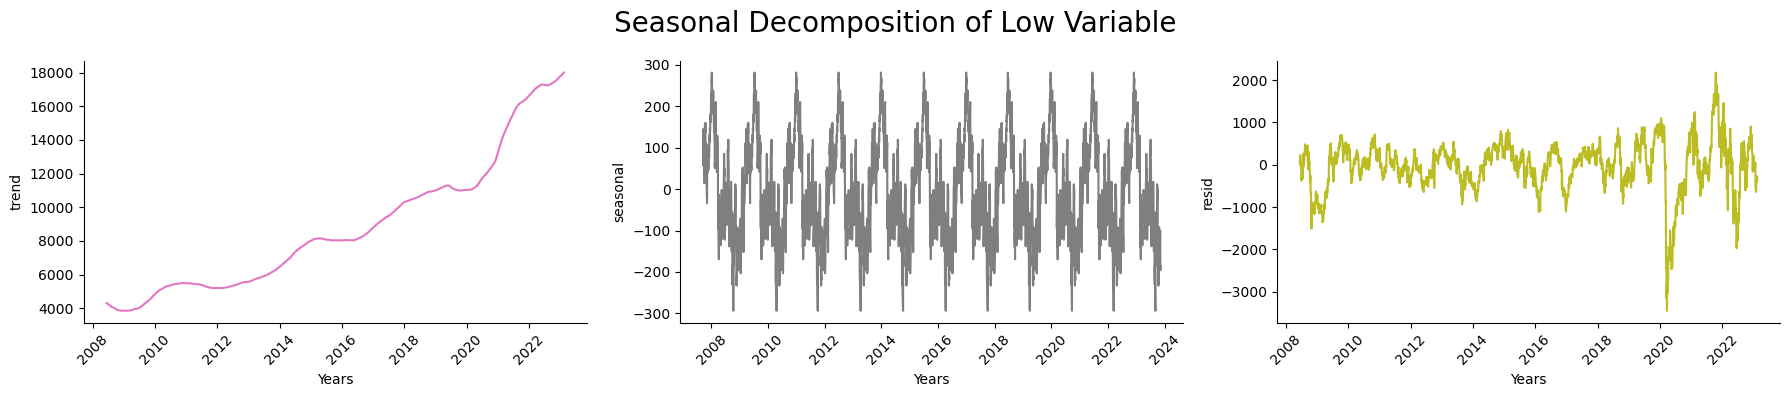

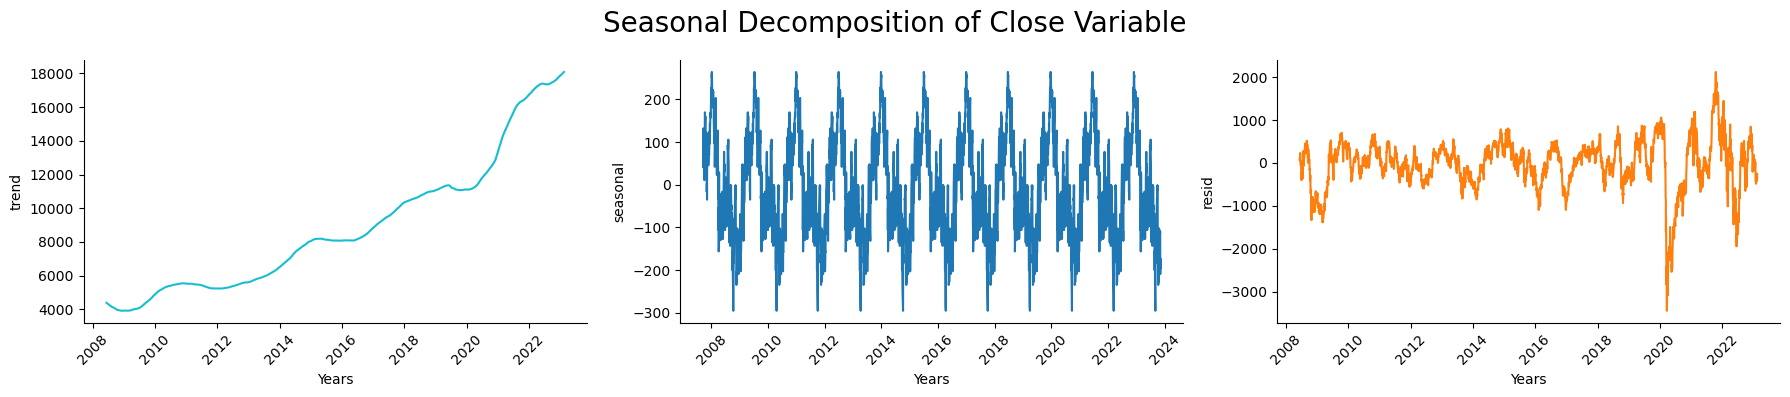

In [82]:
## Additive model
colors = plt.rcParams["axes.prop_cycle"]()
for j in nifty_data.columns[:4]:
    results = seasonal_decompose(nifty_data[j], period=365, model = 'additive')
    trend = results.trend
    seasonal = results.seasonal
    residual = results.resid
    properties = [trend, seasonal, residual]
    a = 1  # number of rows
    b = 3  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(18,4))
    fig.suptitle(f'Seasonal Decomposition of {j} Variable', fontsize=20)
    for i in properties:
        color = next(colors)["color"]
        plt.subplot(a, b, c) 
        plt.plot(i , color=color)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel('Years')
        plt.ylabel(i.name)
        plt.xticks(rotation=45)
        c = c+1
    plt.tight_layout()    
    plt.show()

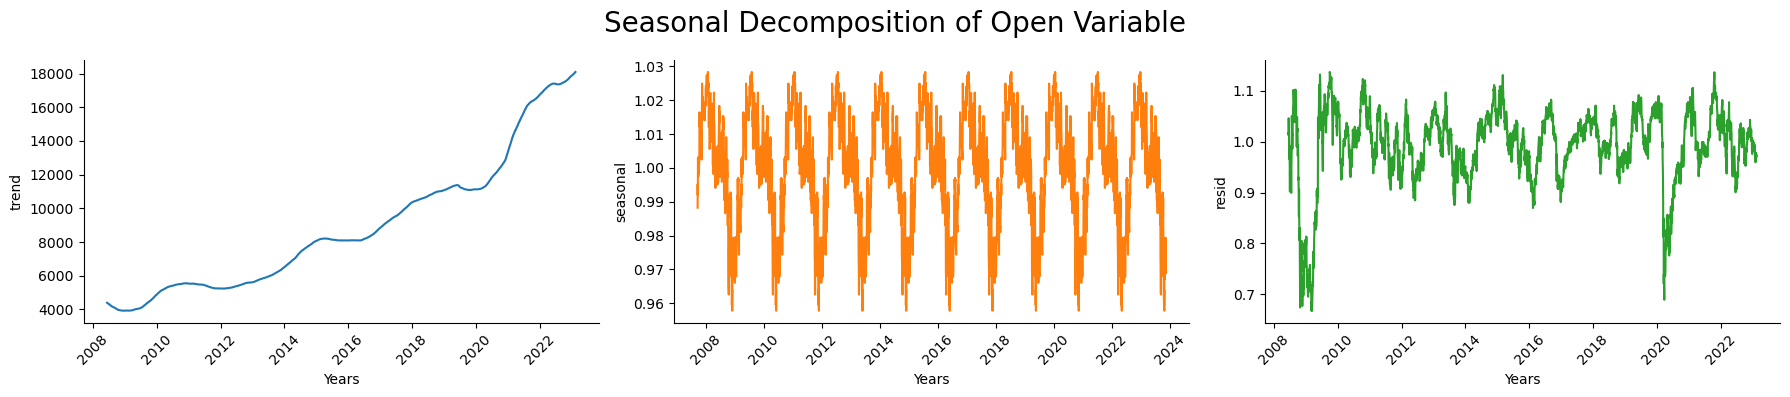

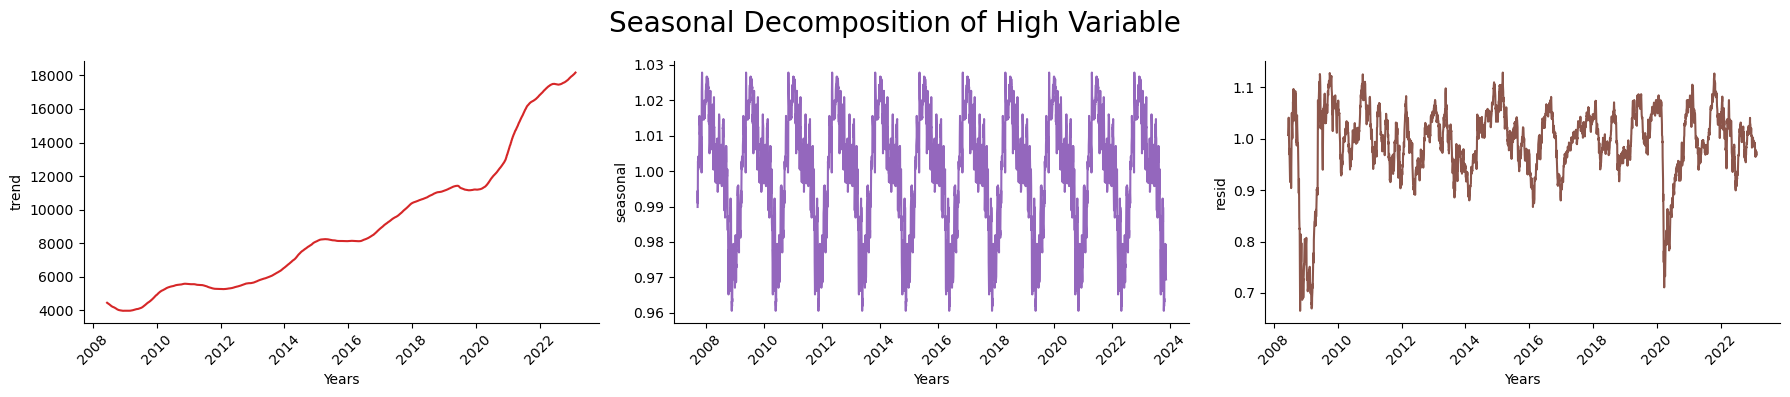

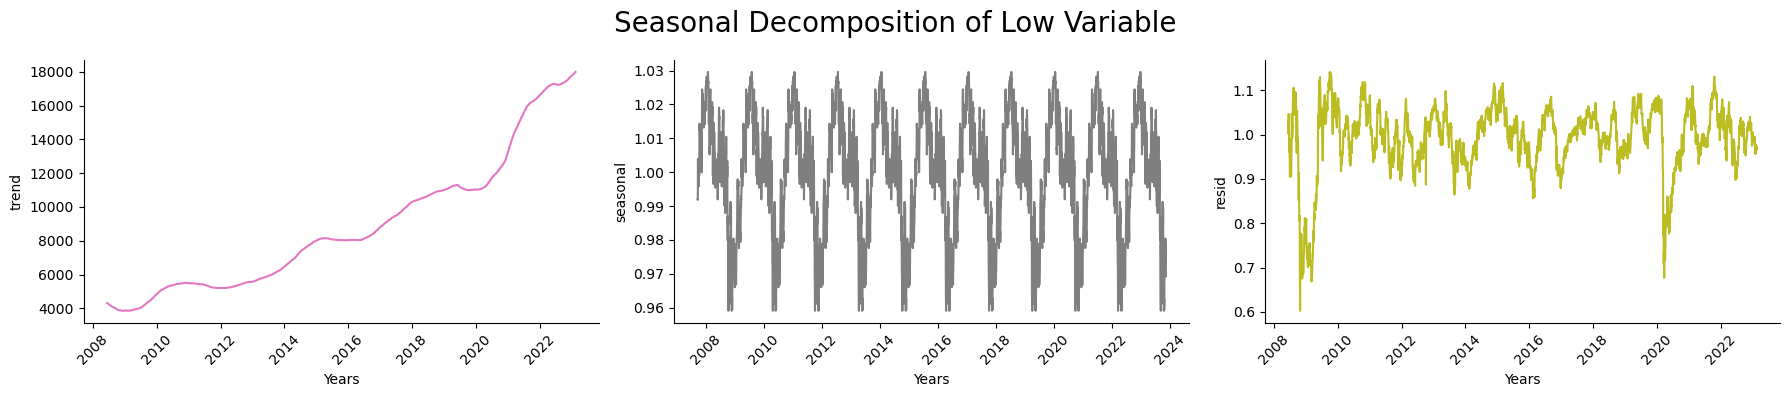

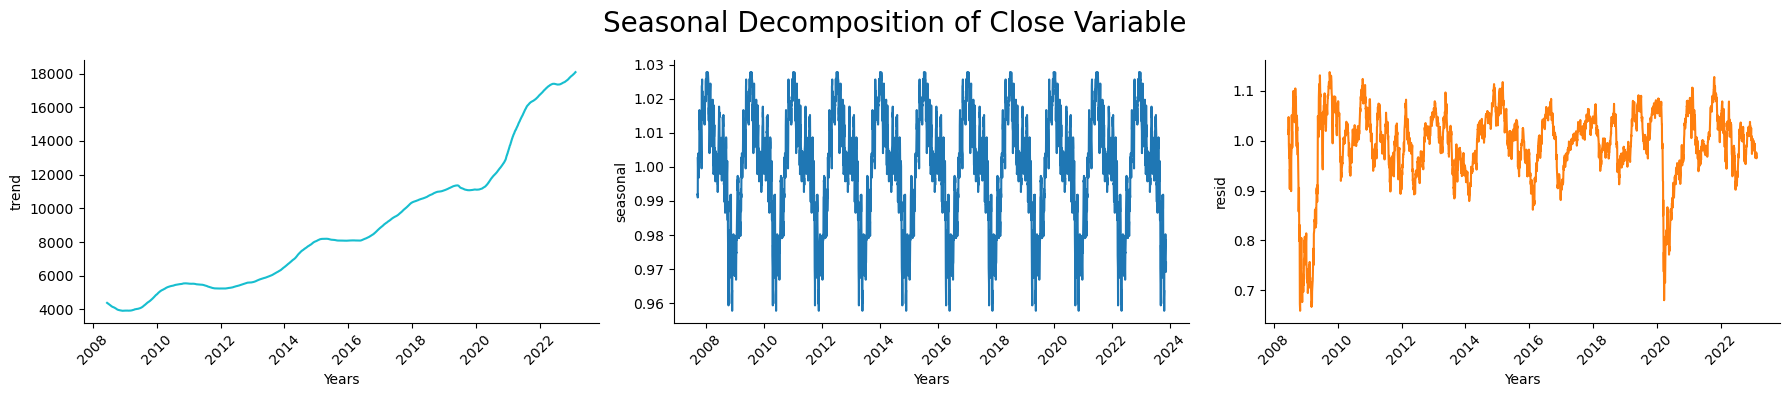

In [83]:
## Multiplicative model
colors = plt.rcParams["axes.prop_cycle"]()
for j in nifty_data.columns[:4]:
    results = seasonal_decompose(nifty_data[j], period=365, model = 'multiplicative')
    trend = results.trend
    seasonal = results.seasonal
    residual = results.resid
    properties = [trend, seasonal, residual]
    a = 1  # number of rows
    b = 3  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(18,4))
    fig.suptitle(f'Seasonal Decomposition of {j} Variable', fontsize=20)
    for i in properties:
        color = next(colors)["color"]
        plt.subplot(a, b, c) 
        plt.plot(i , color=color)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel('Years')
        plt.ylabel(i.name)
        plt.xticks(rotation=45)
        c = c+1
    plt.tight_layout()    
    plt.show()

**Conclusion:** Not much of a qualitative change in trend and seasonality components, but the residuals looks much more stable around a constant level such phenomenon does not of course imply stationarity by itself, but at least a clear signal in the opposite direction is not there anymore.

## Stationarity 

Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time. Many statistical models require the series to be stationary to make effective and precise predictions.

Two statistical tests would be used to check the stationarity of a time series – Augmented Dickey Fuller (“ADF”) test and Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test. A method to convert a non-stationary time series into stationary series shall also be used.

## ADF Test

In [84]:
for x in ['Open','High','Close','Low','Volume']:
    dftest = adfuller(nifty_data[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for Open
-----------------------------
Test statistic = -2.261
P-value = 0.456
Critical values :
	1%: -3.9610637482431206 - The data is not stationary with 99% confidence
	5%: -3.4116020735450783 - The data is not stationary with 95% confidence
	10%: -3.1277048342038665 - The data is not stationary with 90% confidence
ADF test for High
-----------------------------
Test statistic = -2.448
P-value = 0.354
Critical values :
	1%: -3.961068406951032 - The data is not stationary with 99% confidence
	5%: -3.411604331597509 - The data is not stationary with 95% confidence
	10%: -3.1277061636549166 - The data is not stationary with 90% confidence
ADF test for Close
-----------------------------
Test statistic = -2.252
P-value = 0.460
Critical values :
	1%: -3.9610654930437303 - The data is not stationary with 99% confidence
	5%: -3.411602919241504 - The data is not stationary with 95% confidence
	10%: -3.1277053321162183 - The data is not stationary with 90% confidence
ADF test for Lo

**Conclusion:** Since p-value is greater than 0.05, so we fail to reject the null hypothesis here.

In [85]:
## apply Log transformation
for x in ['Open','High','Close','Low']:
    dftest = adfuller(log(nifty_data[x].values), regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for Open
-----------------------------
Test statistic = -3.536
P-value = 0.036
Critical values :
	1%: -3.9610631672321994 - The data is not stationary with 99% confidence
	5%: -3.411601791931814 - The data is  stationary with 95% confidence
	10%: -3.1277046684011762 - The data is  stationary with 90% confidence
ADF test for High
-----------------------------
Test statistic = -4.011
P-value = 0.008
Critical values :
	1%: -3.961073084621562 - The data is  stationary with 99% confidence
	5%: -3.4116065988384996 - The data is  stationary with 95% confidence
	10%: -3.1277074985150812 - The data is  stationary with 90% confidence
ADF test for Close
-----------------------------
Test statistic = -4.211
P-value = 0.004
Critical values :
	1%: -3.961068406951032 - The data is  stationary with 99% confidence
	5%: -3.411604331597509 - The data is  stationary with 95% confidence
	10%: -3.1277061636549166 - The data is  stationary with 90% confidence
ADF test for Low
-----------------------

**Conclusion:** After applying log transformaion, data has become stationary. 


**Statonary Data**

In [86]:
for x in ['Open','High','Close','Low']:
    nifty_data[x] = log(nifty_data[x])


In [87]:
nifty_data = nifty_data.iloc[:,:5]

In [88]:
nifty_data

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17,8.415924,8.422674,8.408014,8.410643,0
2007-09-18,8.410521,8.423278,8.407724,8.422047,0
2007-09-19,8.422937,8.463581,8.422937,8.462177,0
2007-09-20,8.462705,8.468182,8.459808,8.465384,0
2007-09-21,8.466521,8.487909,8.462462,8.484164,0
...,...,...,...,...,...
2023-11-06,9.870233,9.874213,9.868363,9.873634,180700
2023-11-07,9.873237,9.874239,9.869367,9.873374,198700
2023-11-08,9.875582,9.876342,9.873106,9.875268,195000


##  KPSS Test

In [89]:
for x in ['Open','High','Low','Close']:
#     print(" > Is "+x+" data stationary ?")
    print("KPSS test for "+x)
    print("-----------------------------")
    dftest = kpss(np.log(nifty_data[x]), 'ct')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[3].items():
        print("\t{}: {}".format(k, v))

KPSS test for Open
-----------------------------
Test statistic = 0.212
P-value = 0.011
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
KPSS test for High
-----------------------------
Test statistic = 0.232
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
KPSS test for Low
-----------------------------
Test statistic = 0.194
P-value = 0.018
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
KPSS test for Close
-----------------------------
Test statistic = 0.213
P-value = 0.011
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\abhin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



**Conclusion:** 
For 5% Level of Significance, we see that the test statistic value(calculated) is larger than the critical value(tabulated). Hence, we reject the null hypothesis and say that our data is Non stationary.

## Autocorrelation and Partial Autocorrelation Function

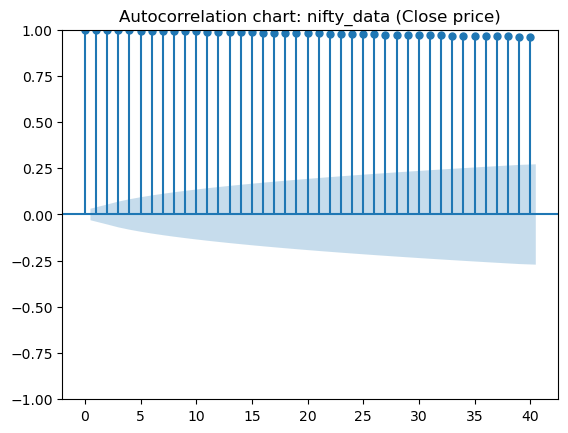

In [90]:
# Autocorrelation of Closing price of nifty50
plot_acf(nifty_data["Close"],lags=40,title="Autocorrelation chart: nifty_data (Close price)")
plt.show()

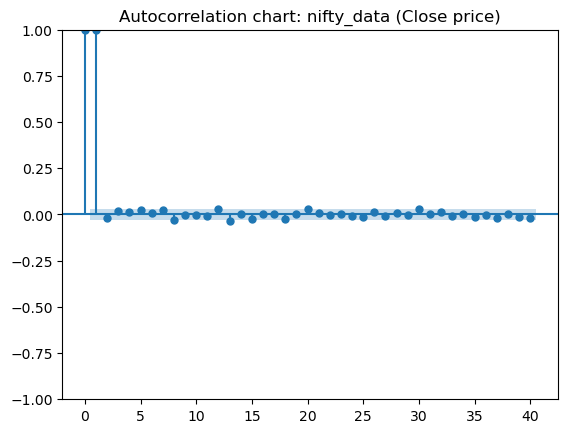

In [91]:
# Partial Autocorrelation of Closing price of nifty50
plot_pacf(nifty_data["Close"],lags=40,title="Autocorrelation chart: nifty_data (Close price)")
plt.show()

**Conclusion:** As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.
Here, only 0th and 1st lag are statistically significant.

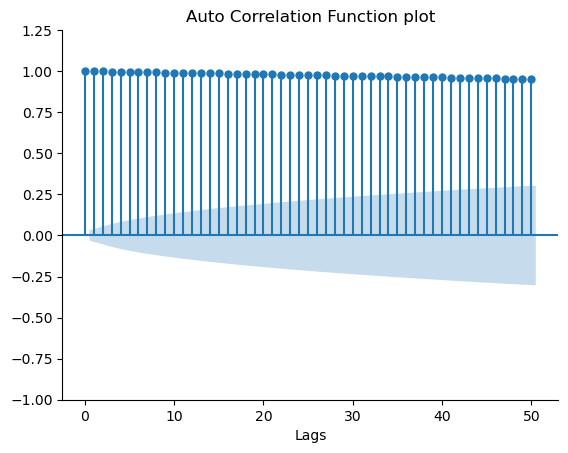

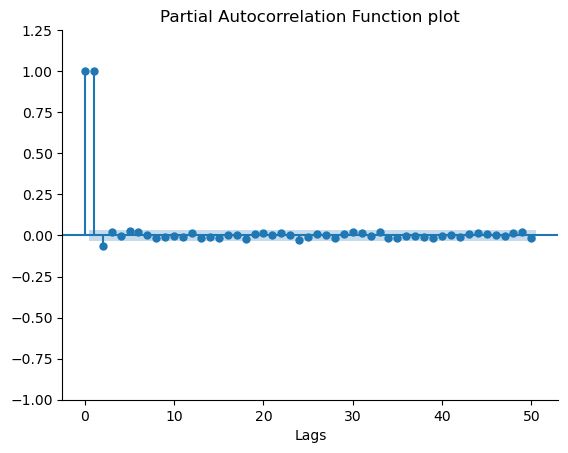

In [92]:
# plot the ACF plot
plot_acf(nifty_data.High, lags=50, title='Auto Correlation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

# plot the PACF plot
plot_pacf(nifty_data.High, lags= 50, title='Partial Autocorrelation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

## For Integrated Order (d)

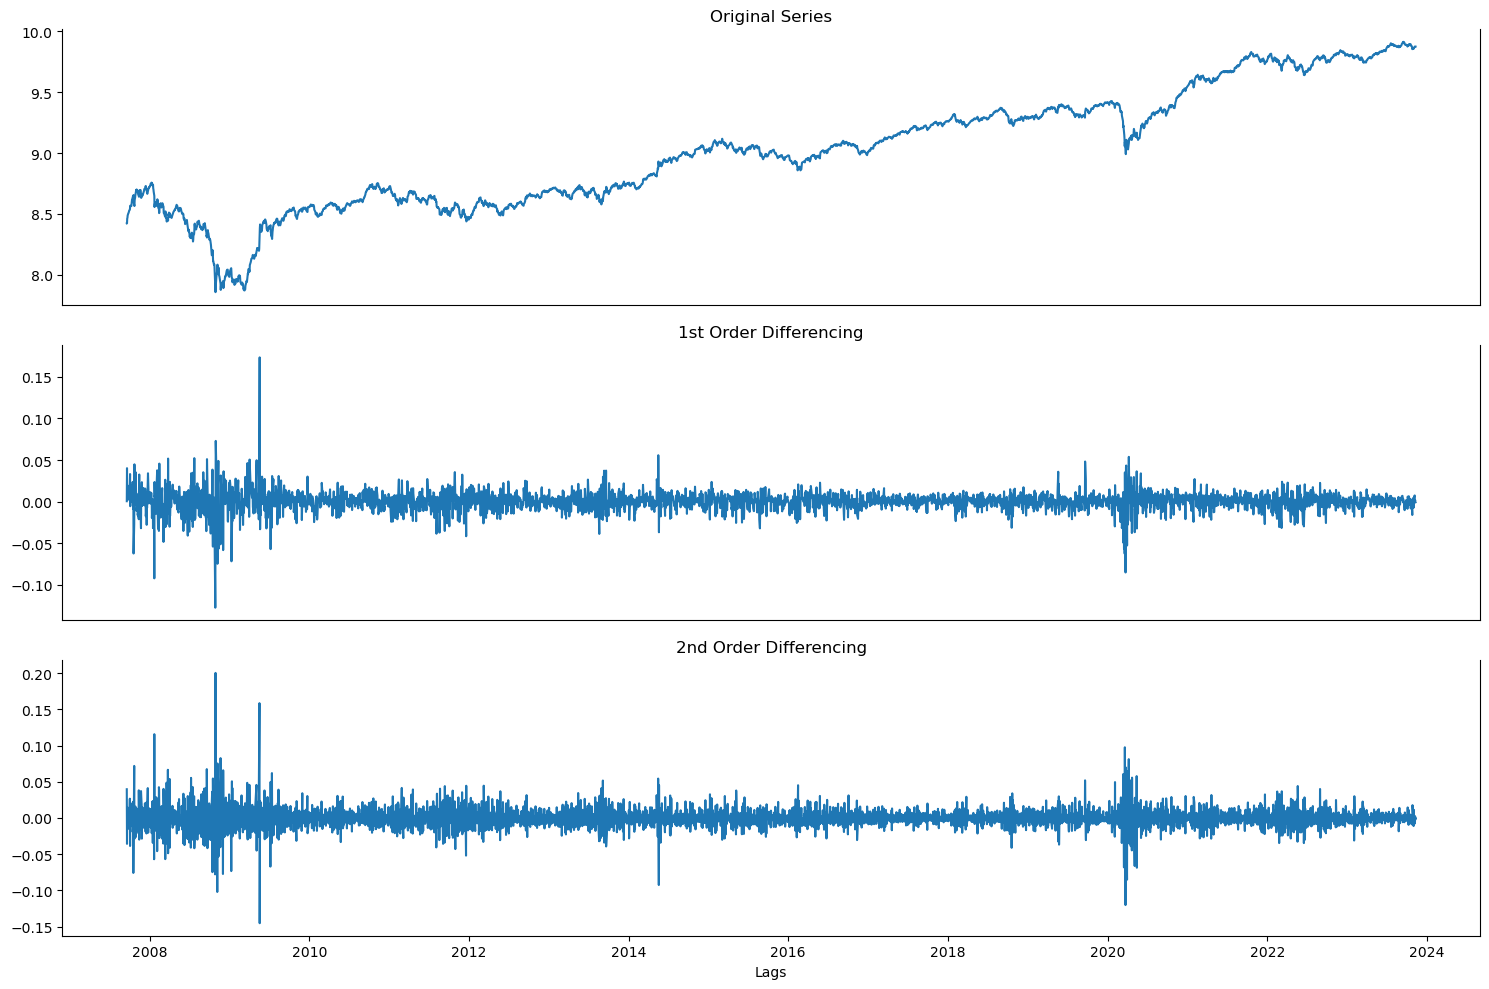

In [93]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
ax1.plot(nifty_data.High); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)

# 1st Differencing
ax2.plot(nifty_data.High.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)

# 2nd Differencing
ax3.plot(nifty_data.High.diff().diff()); ax3.set_title('2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.xlabel('Lags')
plt.tight_layout()
plt.show()

**Conclusion:** Since the series has become stationary at 1st order differencing, we will take d as 1.

## For MA Order (q)

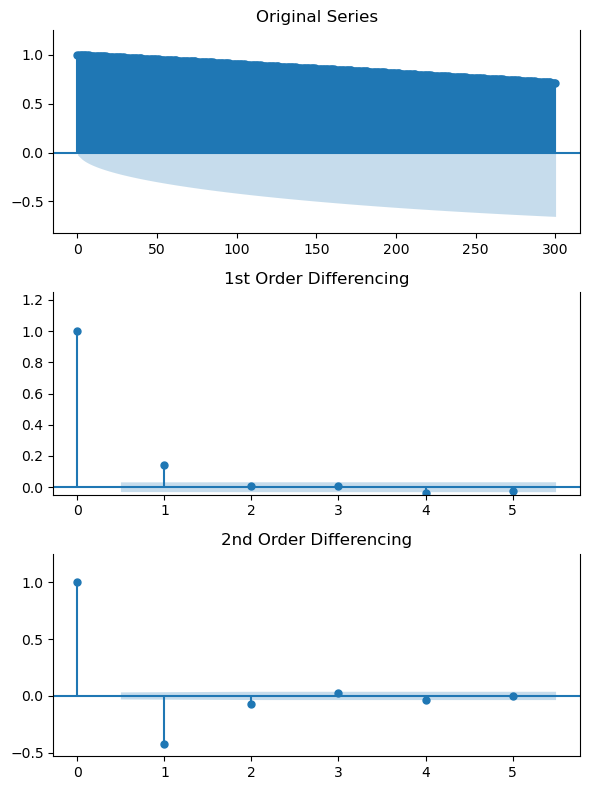

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6, 8))
plot_acf(nifty_data.High, ax=ax1, auto_ylims=True, lags = 300,title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_acf(nifty_data.High.diff().dropna(), auto_ylims=True, lags = 5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(nifty_data.High.diff().diff().dropna(), auto_ylims=True, lags = 5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

**Conclusion:** The value of q is the number of moving average terms (MA terms) in the model and it is the number of lags in the ACF that are significantly non-zero.

## For AR order (p)

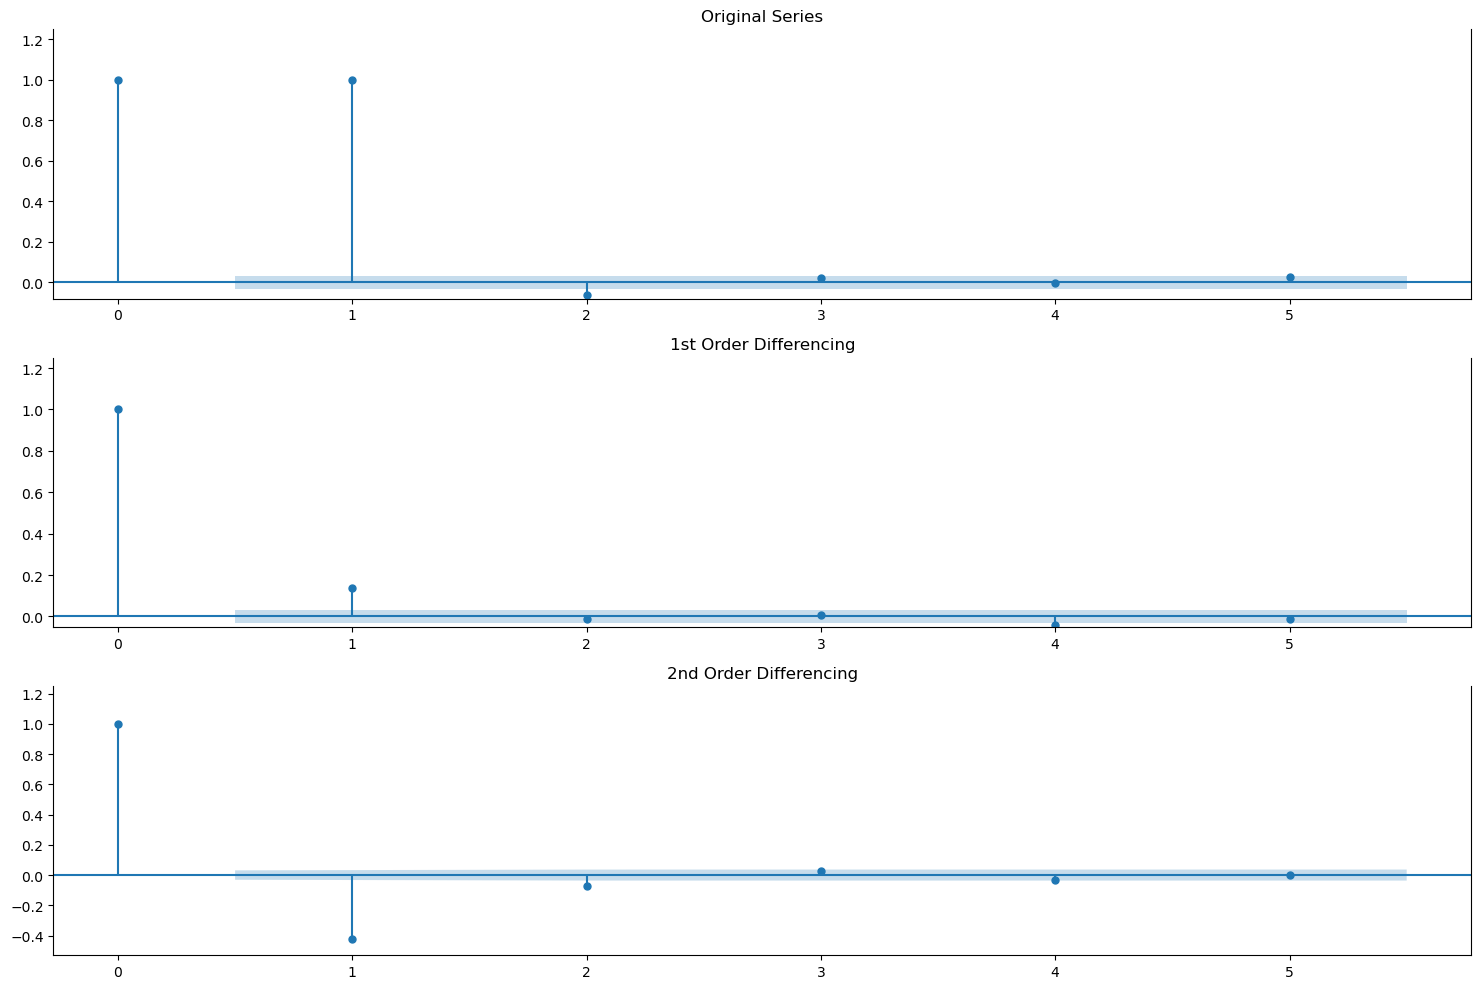

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_pacf(nifty_data.High, auto_ylims=True, lags = 5, ax=ax1, title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_pacf(nifty_data.High.diff().dropna(),auto_ylims=True, lags =5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(nifty_data.High.diff().diff().dropna(), auto_ylims=True, lags =5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

**Conclusion:** The value of p is the number of autoregressive terms (AR terms) in the model and it is the number of lags in the PACF that are significantly non-zero.

## Choosing parameters for ARIMA model

In [96]:
warnings.filterwarnings("ignore")
for x in ['Open','Close','Low','High']:
    resDiff = sm.tsa.arma_order_select_ic(nifty_data[x], max_ar=5, max_ma=5, ic='aic', trend='c')
    print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q,Open) = (4, 5) is the best.
ARMA(p,q,Close) = (3, 3) is the best.
ARMA(p,q,Low) = (5, 4) is the best.
ARMA(p,q,High) = (5, 0) is the best.


In [96]:
## Based on BIC
for x in ['Open','High','Low','Close']:
    selected_order_Open = sm.tsa.arma_order_select_ic(nifty_data['Open'])

In [97]:
selected_order_Open

{'bic':               0             1             2
 0   5417.074358    114.511703  -4437.684052
 1 -22652.219369 -22644.010066 -22636.218660
 2 -22644.022413 -22625.638527 -22615.576730
 3 -22636.339022 -22628.927254 -22623.715107
 4 -22629.504556 -22622.778693 -22613.458627,
 'bic_min_order': (1, 0)}

In [98]:
## Based on BIC
for x in ['Open','High','Low','Close']:
    selected_order_Close = sm.tsa.arma_order_select_ic(nifty_data['Close'])

In [99]:
selected_order_Close

{'bic':               0             1             2
 0   5414.390078     86.418960  -4507.582328
 1 -22777.632133 -22777.738584 -22769.589381
 2 -22777.622847 -22769.439172 -22753.260048
 3 -22769.807142 -22761.156854 -22609.555619
 4 -22763.770764 -22752.984745 -22754.532693,
 'bic_min_order': (1, 1)}

In [100]:
## Based on BIC
for x in ['Open','High','Low','Close']:
    selected_order_High = sm.tsa.arma_order_select_ic(nifty_data['High'])

In [101]:
selected_order_High

{'bic':               0             1             2
 0   5372.287804     -3.247932  -4704.977783
 1 -24037.205264 -24107.764054 -24099.530198
 2 -24107.558522 -24099.651339 -24083.317388
 3 -24099.584329 -24091.988170 -23989.914200
 4 -24091.593549 -24084.650246 -24080.535067,
 'bic_min_order': (1, 1)}

In [102]:
## Based on BIC
for x in ['Open','High','Low','Close']:
    selected_order_Low = sm.tsa.arma_order_select_ic(nifty_data['Low'])

In [103]:
selected_order_Low

{'bic':               0             1             2
 0   5458.778733    126.252858  -4520.590848
 1 -22575.339647 -22617.894247 -22615.594268
 2 -22613.162534 -22609.567928 -22610.598572
 3 -22617.015622 -22604.284576 -22516.271026
 4 -22609.161154 -22600.928337 -22587.332113,
 'bic_min_order': (1, 1)}

**Conclusion:** We will now go ahead and use Statistical Model ARIMA for making predictions. We will predict the Close Figure using the Open, High and Low Values.

## Splitting the data

Before fitting the model let's split the data. Splitting the data here in Time Series is a bit different from the typical Machine Learning Algorithms dataset splitting. Since there is a sequence and we don’t want the model to learn the empty gaps (because of the random splitting), we will split the data based on the year.

We have picked the data prior to 2023 for training data and the remaining data for the testing purposes.

In [104]:
train = nifty_data[nifty_data.index.year < 2023]
test = nifty_data[nifty_data.index.year >= 2023]

In [105]:
model = auto_arima(train["Close"],seasonal=True, information_criterion='aic')

In [106]:
model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

**Conclusion:**  AR(0) MA(1) Differencing(1) (p,d,q) = (0,1,1)

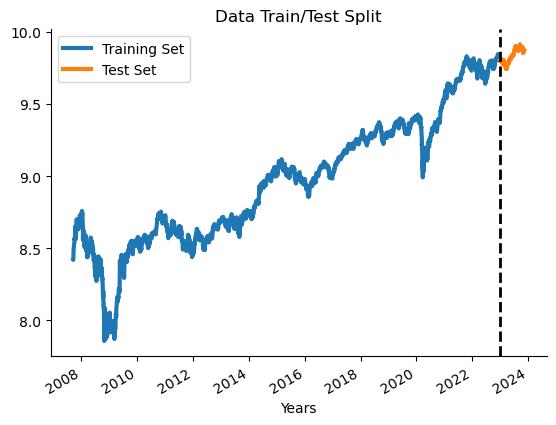

In [107]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
train['High'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=3)

# Plot the Volume column from the test set on the axis
test['High'].plot(ax=ax, label='Test Set',  linewidth=3)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline('2023-01-01', color='black', ls='--', lw=2)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])

# Label the x-axis
ax.set_xlabel('Years')

# Show the plot
plt.show()

In [108]:
print(f'There are {train.shape[0]} rows in the training set and {test.shape[0]} rows in the test set')

There are 3747 rows in the training set and 213 rows in the test set


In [109]:
exogenous_features = ['Open', 'High', 'Low']
train = train[train.columns[:4]]
test = test[test.columns[:4]]

In [110]:
train.head()

,Open,High,Low,Close
Date,,,,
2007-09-17,8.415924,8.422674,8.408014,8.410643
2007-09-18,8.410521,8.423278,8.407724,8.422047
2007-09-19,8.422937,8.463581,8.422937,8.462177
2007-09-20,8.462705,8.468182,8.459808,8.465384
2007-09-21,8.466521,8.487909,8.462462,8.484164


In [111]:
import warnings 
warnings.filterwarnings('ignore')
model = sm.tsa.arima.ARIMA(endog=train['Close'], exog=train[exogenous_features], order=(0, 1, 1))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3747
Model:                 ARIMA(0, 1, 1)   Log Likelihood               14307.352
Date:                Mon, 13 Nov 2023   AIC                         -28604.705
Time:                        10:03:37   BIC                         -28573.563
Sample:                             0   HQIC                        -28593.629
                               - 3747                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5498      0.006    -89.061      0.000      -0.562      -0.538
High           0.9097      0.006    164.871      0.000       0.899       0.920
Low            0.6421      0.003    248.063      0.000       0.637       0.647
ma.L1         -0.9953      0.002   -503.903      0.000      -0.999      -0.991
sigma2      2.811e-05   2.47e-07    113.640      0.000    2.76e-05    2.86e-05
===================================================================================
Ljung-Box (L1) (Q):                  53.34   Jarque-Bera (JB):            416205.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             2.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
train['Predictions'] = model_fit.predict()

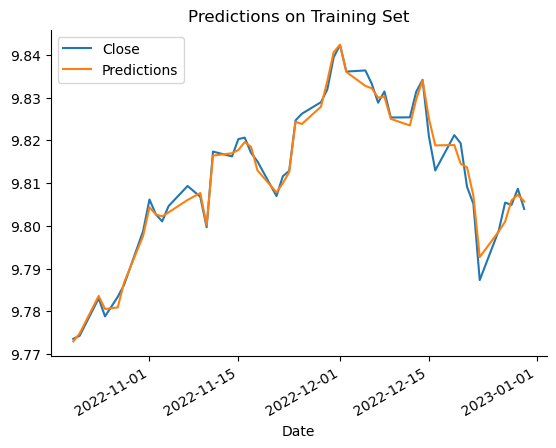

In [113]:
train[['Close', 'Predictions']][-50:].plot()
plt.title('Predictions on Training Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [114]:
#Making Predictions on Test Set
forecast = [model_fit.forecast(exog=test[exogenous_features].iloc[i]).values[0] for i in range(len(test))]
test['Forecast'] = forecast

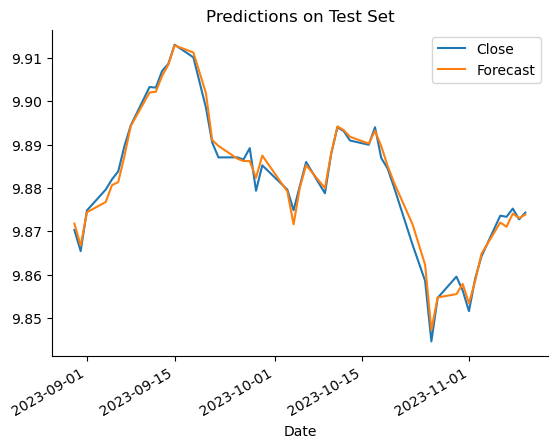

In [115]:
test[['Close','Forecast']][-50:].plot()
plt.title('Predictions on Test Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [116]:
rmse = np.sqrt(mean_squared_error(test['Close'],test['Forecast']))
print(f'The RMSE for Multivariate ARIMAX is {round(rmse,4)}')

The RMSE for Multivariate ARIMAX is 0.0021


In [117]:
test

,Open,High,Low,Close,Forecast
Date,,,,,
2023-01-02,9.805417,9.810009,9.802921,9.809037,9.807272
2023-01-03,9.807153,9.812027,9.806415,9.810964,9.810397
2023-01-04,9.810860,9.811537,9.799271,9.800510,9.803325
2023-01-05,9.803775,9.804788,9.792142,9.797691,9.796504
2023-01-06,9.798574,9.800757,9.786704,9.790288,9.792204
...,...,...,...,...,...
2023-11-06,9.870233,9.874213,9.868363,9.873634,9.872063
2023-11-07,9.873237,9.874239,9.869367,9.873374,9.871079
2023-11-08,9.875582,9.876342,9.873106,9.875268,9.874105


In [121]:
test['Forecast'] = np.exp(test['Forecast'])

In [122]:
test['Forecast']

Date
2023-01-02    18165.366122
2023-01-03    18222.222406
2023-01-04    18093.815766
2023-01-05    17970.815728
2023-01-06    17893.704753
                  ...     
2023-11-06    19381.277891
2023-11-07    19362.228845
2023-11-08    19420.891031
2023-11-09    19401.275723
2023-11-10    19416.398318
Name: Forecast, Length: 213, dtype: float64

In [129]:
for x in ['Open','High','Close','Low']:
    test[x] = np.exp((test[x]))

In [138]:
test.tail(25)

,Open,High,Low,Close,Forecast
Date,,,,,
2023-10-06,19621.199219,19675.750000,19589.400391,19653.500000,19639.307279
2023-10-09,19539.449219,19588.949219,19480.500000,19512.349609,19535.374536
2023-10-10,19565.599609,19717.800781,19565.449219,19689.849609,19692.732337
2023-10-11,19767.000000,19839.199219,19756.949219,19811.349609,19815.352910
2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19798.538738
2023-10-13,19654.550781,19805.400391,19635.300781,19751.050781,19768.239045
2023-10-16,19737.250000,19781.300781,19691.849609,19731.750000,19737.238650
2023-10-17,19843.199219,19849.750000,19775.650391,19811.500000,19795.068743
2023-10-18,19820.449219,19840.949219,19659.949219,19671.099609,19725.103930


**Conclusion:** Our close price forecasting model accurately predicted the stock's future values, aligning closely with the observed closing prices.

**This successful outcome underscores the reliability and effectiveness of our forecasting approach.**